Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

A power plant is an industrial facility that generates electricity from primary energy. Most power plants use one or more generators that convert mechanical energy into electrical energy in order to supply power to the electrical grid for society's electrical needs.

In [1]:
#import all libaries
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
url="https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv"



In [2]:
#stroing into csv file
df = pd.read_csv(url)
df.to_csv("Global_Power_Plant_Database.csv",sep='\t')

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The columns country,country_long,primary_fuel,geolocation_source,generation_data_source has categorical(nominal)data type.And name,gppd_idnr,year_of_capacity_data has categorical ordinal data type and capacity_mw,latitude,longitude,generation_gwh_2013, generation_gwh_2014, generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 has continous data type.

Here we are going to predict two columns one is 'capacity_mw' has continous values.Hence it is a Regression problem.

The other target is 'primary_fuel' which has categorical ordinal data type.Hence it is a Classification Problem.

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.shape

(908, 25)

EDA:

In [6]:
#checks nulls values of columns if present any
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

We can observe that the columns other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh has null values in all the rows.So we can drop these columns 

In [7]:
df=df.drop(['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1)

The column other_fuel1 has null values higher than 60% of the overall column values.So we can drop this column too

In [8]:
df=df.drop(['other_fuel1'],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                862 non-null    float64
 6   longitude               862 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   commissioning_year      528 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  908 non-null    object 
 11  url                     908 non-null    object 
 12  geolocation_source      889 non-null    object 
 13  year_of_capacity_data   520 non-null    float64
 14  generation_gwh_2013     384 non-null    fl

In [10]:
df.apply(lambda x: len(x.unique())) # getting unique values of all the columns

country                     1
country_long                1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  838
longitude                 829
primary_fuel                8
commissioning_year         74
owner                     281
source                    191
url                       304
geolocation_source          4
year_of_capacity_data       2
generation_gwh_2013       365
generation_gwh_2014       375
generation_gwh_2015       399
generation_gwh_2016       406
generation_gwh_2017       411
generation_data_source      2
dtype: int64

In [11]:
df_country=df.groupby(['country_long']).size().sort_values(0, ascending=False).reset_index()
df_country.head()

,country_long,0
0,India,908


We can observe India is the only country available in the dataset which has many power plants all over

In [12]:
df_country_fuel=df.groupby(['country_long','primary_fuel']).size().sort_values(0, ascending=False).reset_index()
df_country_fuel.head()

,country_long,primary_fuel,0
0,India,Coal,259
1,India,Hydro,250
2,India,Solar,127
3,India,Wind,123
4,India,Gas,69


We can observe the Coal Fuel is used heavily and highly in power plants than other fuels.Gas is the least used among the both renewable and non renewable fuels

In [13]:
df.fillna(0.0,inplace=True) #filling empty values and since column has many number of rows empty.So we fill with zero instead of mean,median or mode.otherwise calculations might be misinterpreted

In [14]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,0.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,0.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,0.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,0.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,0.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,0.000000,0.000000,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,0.0,0.0,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [15]:
df['country'].unique()

array(['IND'], dtype=object)

In [16]:
df['country_long'].unique()

array(['India'], dtype=object)

In [17]:
df['year_of_capacity_data'].unique()

array([   0., 2018.])

By checking the unique values we can come to know there is only one country 'India' and The report generated for all the plants in the same year only 2018

In [18]:
df['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [19]:
# Unique fuel types
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [20]:
renewable = ['Hydro', 'Wind','Solar', 'Biomass']
non_renewable = ['Gas', 'Oil', 'Coal','Nuclear']


In [21]:
def fuel_type(fuel):
    if fuel in renewable:
        type = 'renewable'
    elif fuel in non_renewable:
        type = 'non_renewable'
    else: type = None
    return type

seggregating the fuels according to its nature type

In [22]:
df['primary_fuel_type'] = df['primary_fuel'].map(lambda x: fuel_type(x))

In [23]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,...,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,primary_fuel_type
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,...,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,0.0,Ultratech Cement ltd,...,http://www.ultratechcement.com/,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,non_renewable
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,0.0,AES,...,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,0.0,...,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,non_renewable
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,0.0,...,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,non_renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,0.0,...,http://www.cea.nic.in/,WRI,2018.0,0.000000,0.000000,0.994875,233.596650,865.400000,Central Electricity Authority,non_renewable
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,0.0,Karnataka Power Corporation Limited,...,http://karnatakapower.com,Industry About,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,0.0,0.0,...,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,0.0,Hindustan Zinc ltd,...,http://www.hzlindia.com/,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,non_renewable


In [24]:
df['primary_fuel_type'].value_counts()

renewable        550
non_renewable    358
Name: primary_fuel_type, dtype: int64

Renewable energy is used higher than non-renewable energy

In [25]:
df.groupby(['country_long'])['capacity_mw'].value_counts()

country_long  capacity_mw
India         5.0            39
              10.0           22
              600.0          21
              15.0           20
              1200.0         19
                             ..
              3300.0          1
              3960.0          1
              4000.0          1
              4620.0          1
              4760.0          1
Name: capacity_mw, Length: 365, dtype: int64

We can observe that low capacity_mw(capacity_mega watts)generated is higher in counts than high energy generated

In [26]:
df.groupby(['country_long'])['primary_fuel'].value_counts()

country_long  primary_fuel
India         Coal            259
              Hydro           250
              Solar           127
              Wind            123
              Gas              69
              Biomass          50
              Oil              21
              Nuclear           9
Name: primary_fuel, dtype: int64

Coal is the most used fuel and Nuclear is the least used one in all over India

In [27]:
df.groupby(['country_long'])['name'].value_counts()

country_long  name                        
India         ACME Solar Tower                1
              ADITYA CEMENT WORKS             1
              AES Saurashtra Windfarms        1
              AGARTALA GT                     1
              AKALTARA TPP                    1
                                             ..
              YERMARUS TPP                    1
              Yelesandra Solar Power Plant    1
              Yelisirur wind power project    1
              ZAWAR MINES                     1
              iEnergy Theni Wind Farm         1
Name: name, Length: 908, dtype: int64

The plants are in distinct units only.

In [28]:
df['name'].value_counts()

MANI DPH                               1
Bamani Solar Power Plant               1
INDIA POWER TPP(HALDIA  HIRANMAYE )    1
Shree Sangli Wind Farm                 1
BOKARO A ''EXP''                       1
                                      ..
KUTTIADI                               1
Khirsara - Unity Solar Power Plant     1
MUMBAI ONGC                            1
Singrauli Solar Power Plant            1
BHIVPURI                               1
Name: name, Length: 908, dtype: int64

Each plants runs seperately

In [29]:

df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

Natural resource fuels are mostly used

<AxesSubplot:xlabel='primary_fuel'>

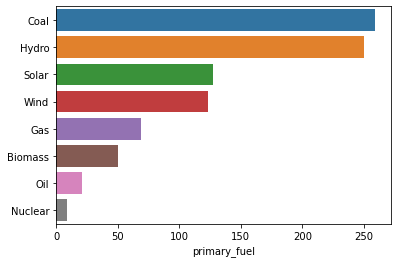

In [30]:
 sns.barplot(x=df['primary_fuel'].value_counts(), y=df['primary_fuel'].value_counts().keys(), data=df)

Coal is most used fuel and nuclear is least used for power plants

<AxesSubplot:xlabel='primary_fuel_type'>

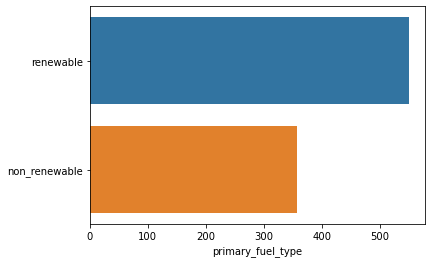

In [31]:
sns.barplot(x=df['primary_fuel_type'].value_counts(), y=df['primary_fuel_type'].value_counts().keys(), data=df)

Renewable fuels are most used than Non Renewable fuels

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

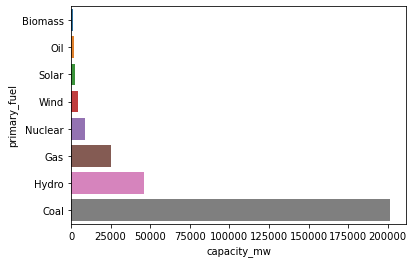

In [32]:
sns.barplot(x=df.groupby('primary_fuel')['capacity_mw'].sum().sort_values(), y=df.groupby('primary_fuel')['capacity_mw'].sum().sort_values().keys(), data=df)

Coal generates more capacity_mw(capacity mega watts) of power than others

converting object data type to float data type

In [33]:
df['generation_gwh_2013'] = df['generation_gwh_2013'].map(lambda x: float(x))
df['generation_gwh_2014'] = df['generation_gwh_2014'].map(lambda x: float(x))
df['generation_gwh_2015'] = df['generation_gwh_2015'].map(lambda x: float(x))
df['generation_gwh_2016'] = df['generation_gwh_2016'].map(lambda x: float(x))
df['generation_gwh_2017'] = df['generation_gwh_2017'].map(lambda x: float(x))
df['latitude'] = df['latitude'].map(lambda x: float(x))
df['longitude'] = df['longitude'].map(lambda x: float(x))

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

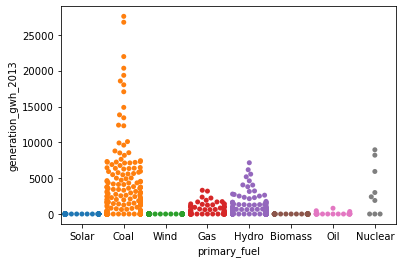

In [34]:
sns.swarmplot(data=df, y="generation_gwh_2013",x="primary_fuel")

the coal generated more generation of GW than others in the year 2013

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

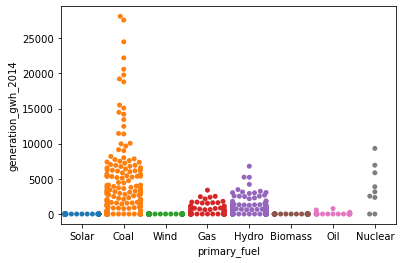

In [35]:
sns.swarmplot(data=df, y="generation_gwh_2014",x="primary_fuel")

the coal generated more generation of GW than others in the year 2014

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

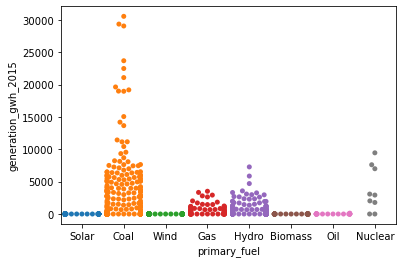

In [36]:
sns.swarmplot(data=df, y="generation_gwh_2015",x="primary_fuel")

the coal generated more generation of GW than others in the year 2015

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

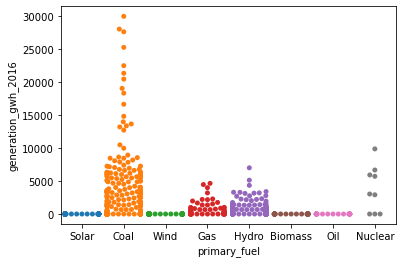

In [37]:
sns.swarmplot(data=df, y="generation_gwh_2016",x="primary_fuel")

the coal generated more generation of GW than others in the year 2016

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

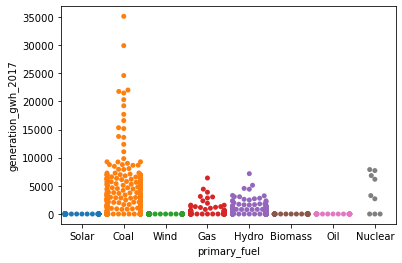

In [38]:
sns.swarmplot(data=df, y="generation_gwh_2017",x="primary_fuel")

the coal generated more generation of GW than others in the year 2017

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

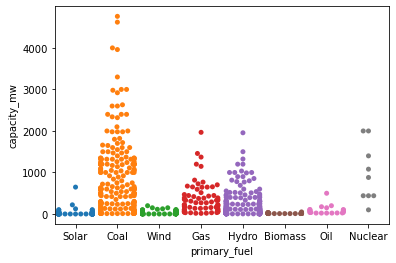

In [39]:
sns.swarmplot(data=df, y="capacity_mw",x="primary_fuel")

Biomass,oil and Nuclear generates least capacity_mw 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   commissioning_year      908 non-null    float64
 9   owner                   908 non-null    object 
 10  source                  908 non-null    object 
 11  url                     908 non-null    object 
 12  geolocation_source      908 non-null    object 
 13  year_of_capacity_data   908 non-null    float64
 14  generation_gwh_2013     908 non-null    fl

object type need to be converted to number type for model learning

In [41]:
df_scatter = df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

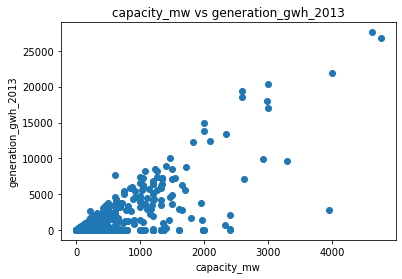

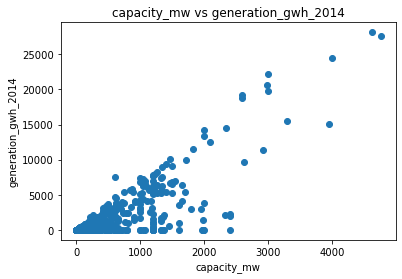

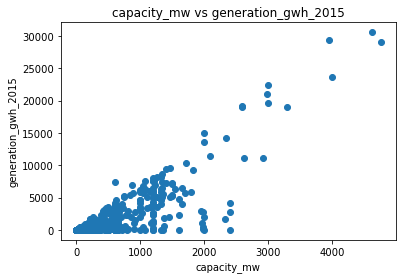

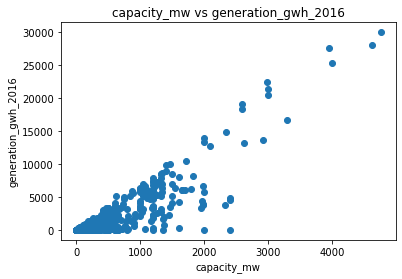

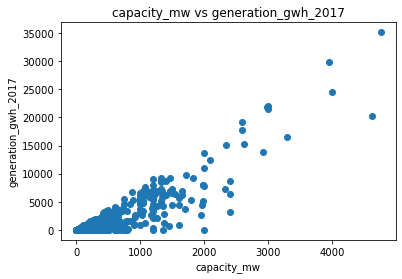

In [42]:
x_col = "capacity_mw"

for y_col in df_scatter:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[x_col], df_scatter[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    
    plt.show()

From the graph we can observe in all years when generation of GW increases the capacity_mw will also increase

(-1.1064691229475203,
 1.113587562469859,
 -1.1106228085629117,
 1.1094338768544676)

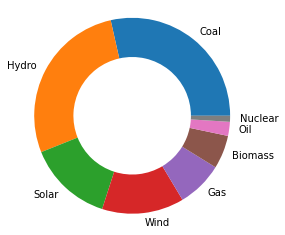

In [43]:
# value counts of primary fuel column
sorted_counts=df['primary_fuel'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

From this,we can observe coal is highly used.the next is hydro  and third is solar energy

(-1.1127461937147625,
 1.1207946343387643,
 -1.1195090139044832,
 1.1140318141490435)

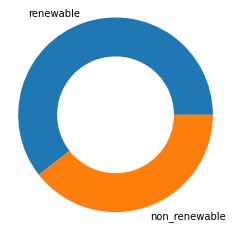

In [44]:
# value counts of primary fuel column
sorted_counts=df['primary_fuel_type'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

renewable energy are highly available and used than non renewable energy

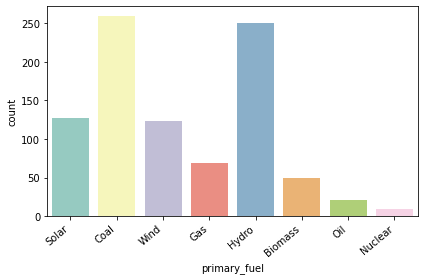

In [45]:
ax = sns.countplot(x="primary_fuel", data=df,palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

coal is high in numbers

Text(0, 0.5, 'Capacity generated in mega watts')

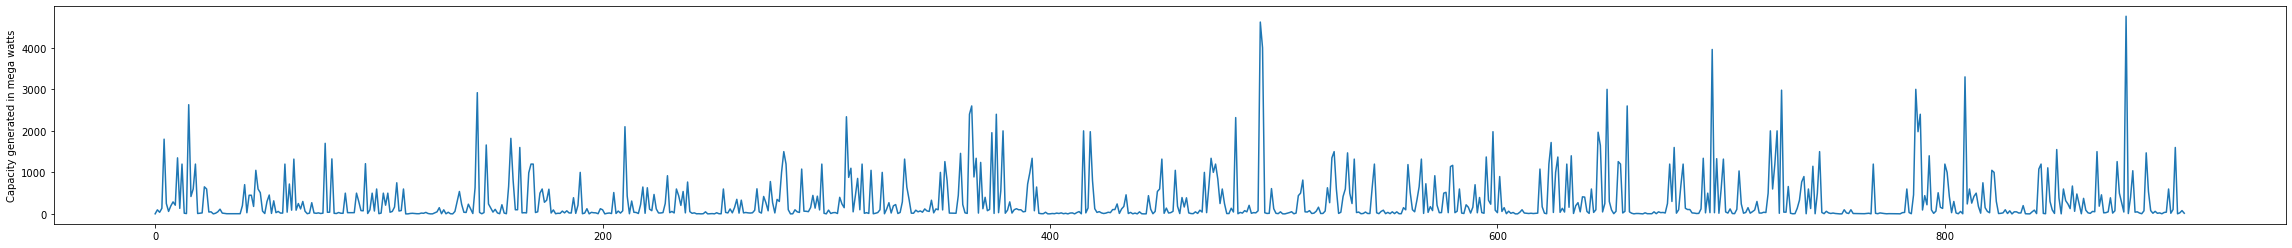

In [46]:
df.capacity_mw.plot(figsize=(40,4))
plt.ylabel('Capacity generated in mega watts')

at certain times only capacity_mw's value reaches very high.other times it keeps gives  around some values

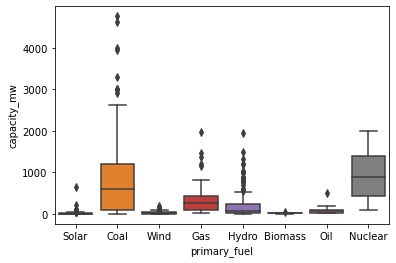

In [47]:
ax = sns.boxplot(x="primary_fuel", y="capacity_mw", data=df)

the average of coal is high than others

In [48]:
df[df['primary_fuel_type']=='non_renewable'].groupby('country_long')['capacity_mw'].sum().sort_values(ascending=False)

country_long
India    237305.931
Name: capacity_mw, dtype: float64

total non renewable energy generated

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='capacity_mw'>

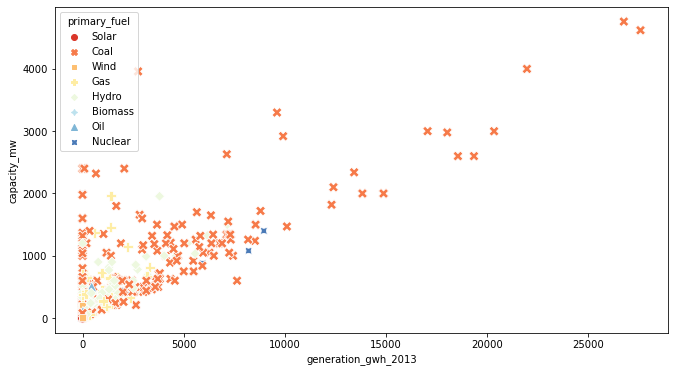

In [49]:
plt.figure(figsize = (11,6))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2013', data = df, hue = 'primary_fuel', style='primary_fuel', palette='RdYlBu', s =100 )

this shows all fuel wise generation of GW and their corresponding change in capacity_mw

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

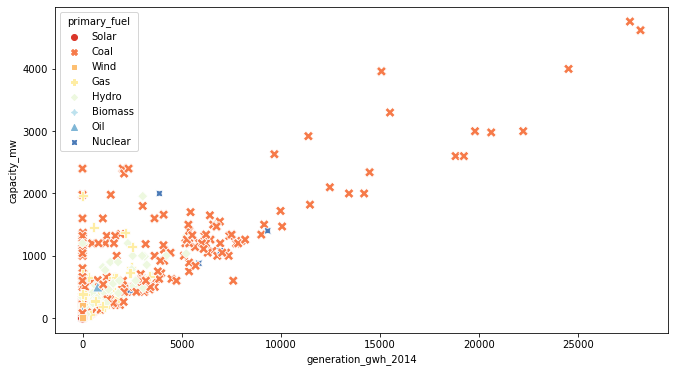

In [50]:
plt.figure(figsize = (11,6))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2014', data = df, hue = 'primary_fuel', style='primary_fuel', palette='RdYlBu', s =100 )

when generation of Gw  increases the capacity_mw also increases

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

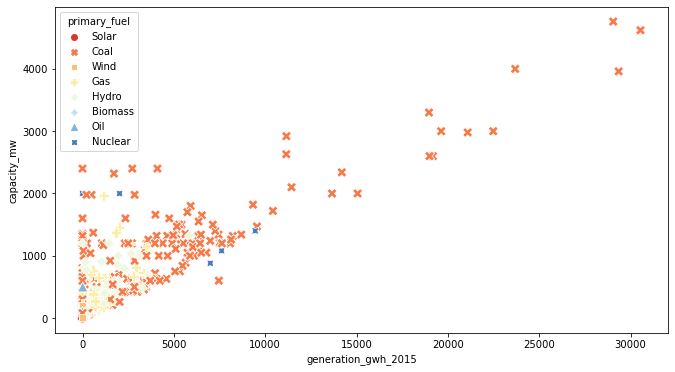

In [51]:
plt.figure(figsize = (11,6))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2015', data = df, hue = 'primary_fuel', style='primary_fuel', palette='RdYlBu', s =100 )

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

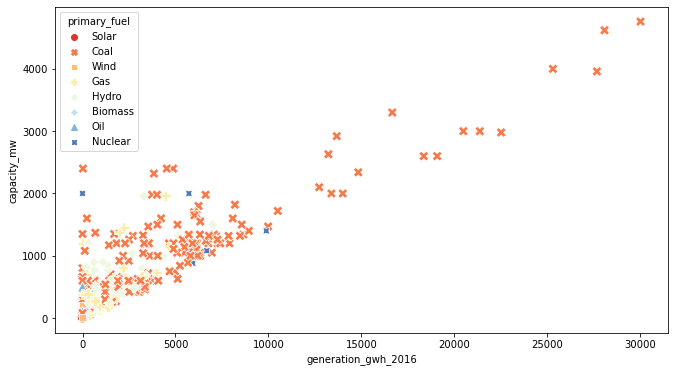

In [52]:
plt.figure(figsize = (11,6))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2016', data = df, hue = 'primary_fuel', style='primary_fuel', palette='RdYlBu', s =100 )

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

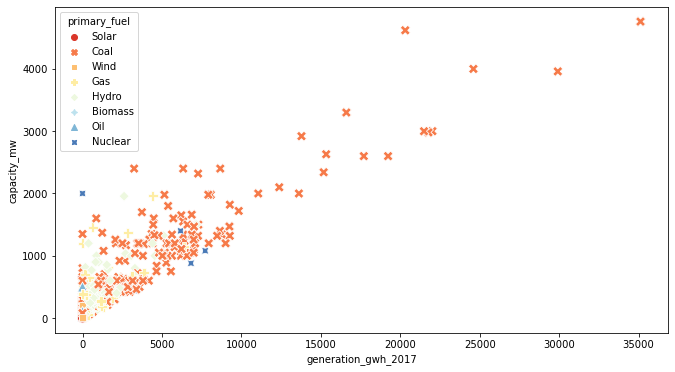

In [53]:
plt.figure(figsize = (11,6))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2017', data = df, hue = 'primary_fuel', style='primary_fuel', palette='RdYlBu', s =100 )

from all the graphs we can see that coal produce more and nuclear produce less

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='capacity_mw'>

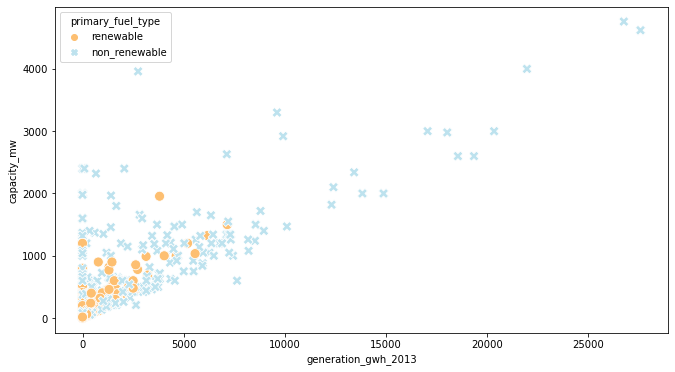

In [54]:
plt.figure(figsize = (11,6))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2013', data = df, hue = 'primary_fuel_type', style='primary_fuel_type', palette='RdYlBu', s =100 )

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

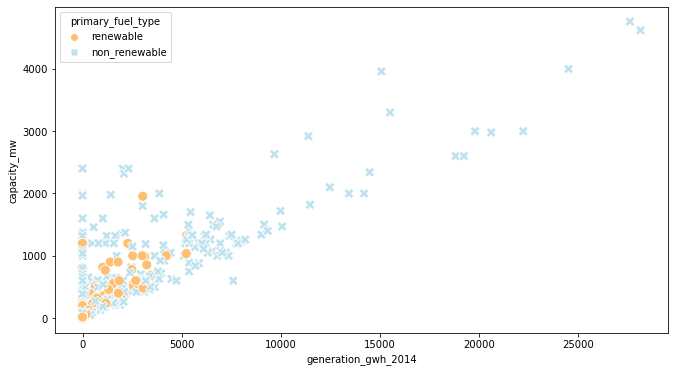

In [55]:
plt.figure(figsize = (11,6))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2014', data = df, hue = 'primary_fuel_type', style='primary_fuel_type', palette='RdYlBu', s =100 )

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

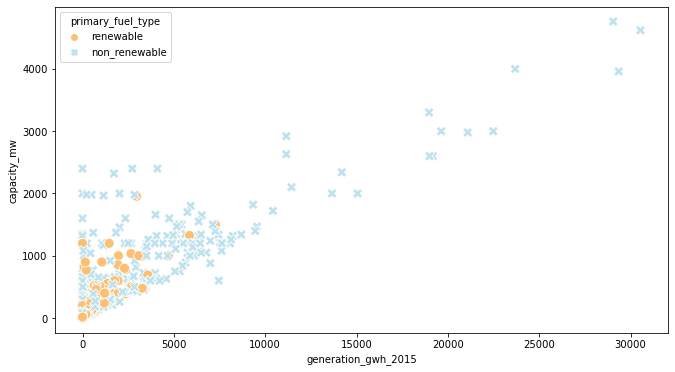

In [56]:
plt.figure(figsize = (11,6))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2015', data = df, hue = 'primary_fuel_type', style='primary_fuel_type', palette='RdYlBu', s =100 )

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

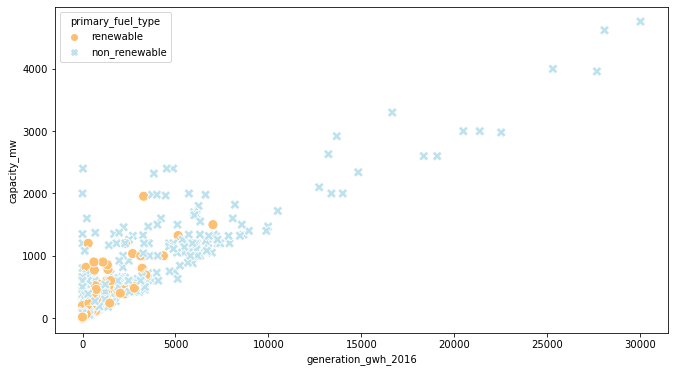

In [57]:
plt.figure(figsize = (11,6))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2016', data = df, hue = 'primary_fuel_type', style='primary_fuel_type', palette='RdYlBu', s =100 )

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

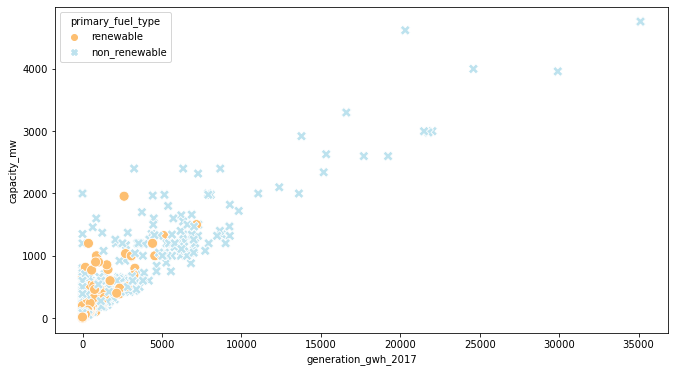

In [58]:
plt.figure(figsize = (11,6))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2017', data = df, hue = 'primary_fuel_type', style='primary_fuel_type', palette='RdYlBu', s =100 )

when generation of GW increases the capvity_mw also increases

In [59]:
df_dist = df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

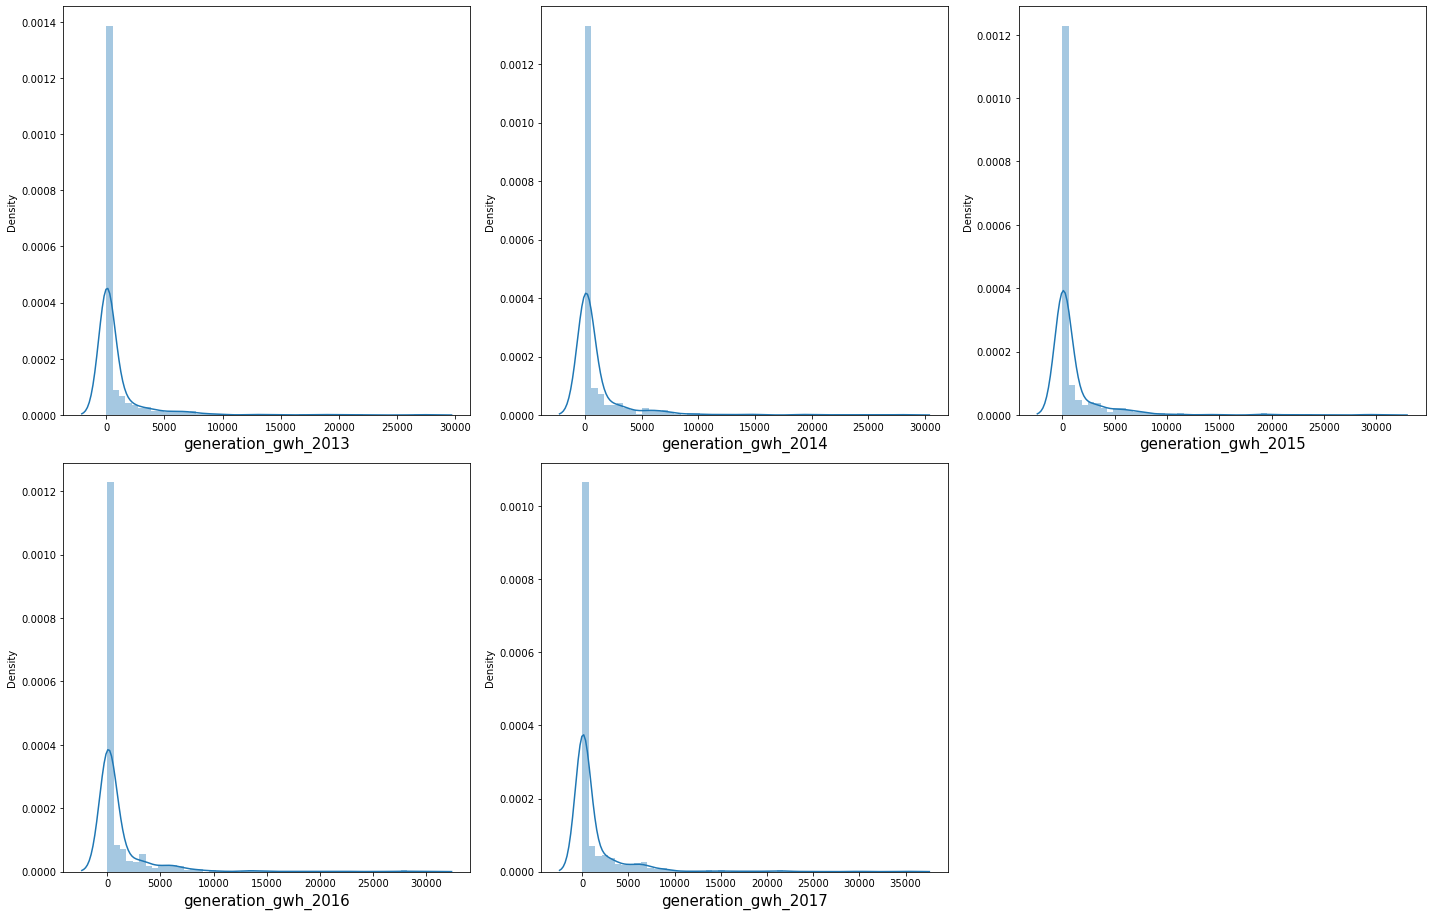

In [60]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in df_dist.columns:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df_dist[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

generation of gw is higher in numbers in low range values

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   commissioning_year      908 non-null    float64
 9   owner                   908 non-null    object 
 10  source                  908 non-null    object 
 11  url                     908 non-null    object 
 12  geolocation_source      908 non-null    object 
 13  year_of_capacity_data   908 non-null    float64
 14  generation_gwh_2013     908 non-null    fl

In [62]:
df['generation_gwh_2013'] = df['generation_gwh_2013'].map(lambda x: float(x))
df['generation_gwh_2014'] = df['generation_gwh_2014'].map(lambda x: float(x))
df['generation_gwh_2015'] = df['generation_gwh_2015'].map(lambda x: float(x))
df['generation_gwh_2016'] = df['generation_gwh_2016'].map(lambda x: float(x))
df['generation_gwh_2017'] = df['generation_gwh_2017'].map(lambda x: float(x))

object data type converted to float data type

In [63]:
df_grpby = df.groupby(['country', 'country_long', 'primary_fuel'])['generation_gwh_2013'].sum()
df_grpby = pd.DataFrame(df_grpby).reset_index()
df_grpby.head()

,country,country_long,primary_fuel,generation_gwh_2013
0,IND,India,Biomass,0.000000
1,IND,India,Coal,674018.025887
2,IND,India,Gas,43461.798060
3,IND,India,Hydro,134730.860500
4,IND,India,Nuclear,30408.588000


coal generates more GWh in 2013

In [64]:
df_grpby = df.groupby(['country', 'country_long', 'primary_fuel'])['generation_gwh_2014'].sum()
df_grpby = pd.DataFrame(df_grpby).reset_index()
df_grpby.head()

,country,country_long,primary_fuel,generation_gwh_2014
0,IND,India,Biomass,0.000000
1,IND,India,Coal,764840.625920
2,IND,India,Gas,40099.876382
3,IND,India,Hydro,129551.355420
4,IND,India,Nuclear,34072.893150


coal is used and it generates high gwh in 2014

In [65]:
df_grpby = df.groupby(['country', 'country_long', 'primary_fuel'])['generation_gwh_2015'].sum()
df_grpby = pd.DataFrame(df_grpby).reset_index()
df_grpby.head()

,country,country_long,primary_fuel,generation_gwh_2015
0,IND,India,Biomass,0.000000
1,IND,India,Coal,824245.665475
2,IND,India,Gas,46208.780652
3,IND,India,Hydro,121408.501625
4,IND,India,Nuclear,33879.000000


In [66]:
df_grpby = df.groupby(['country', 'country_long', 'primary_fuel'])['generation_gwh_2016'].sum()
df_grpby = pd.DataFrame(df_grpby).reset_index()
df_grpby.head()

,country,country_long,primary_fuel,generation_gwh_2016
0,IND,India,Biomass,0.000000
1,IND,India,Coal,867830.141010
2,IND,India,Gas,47925.719163
3,IND,India,Hydro,122380.663790
4,IND,India,Nuclear,34180.870000


In [67]:
df_grpby = df.groupby(['country', 'country_long', 'primary_fuel'])['generation_gwh_2017'].sum()
df_grpby = pd.DataFrame(df_grpby).reset_index()
df_grpby.head()

,country,country_long,primary_fuel,generation_gwh_2017
0,IND,India,Biomass,0.000000
1,IND,India,Coal,911343.603160
2,IND,India,Gas,49348.106481
3,IND,India,Hydro,126287.022845
4,IND,India,Nuclear,34587.320000


nuclear is the least generator of gwh in these years 2013-2017

In [68]:
df_capacity = df.groupby(['country', 'country_long', 'primary_fuel'])['capacity_mw'].sum()
df_capacity1 = df.groupby(['country', 'country_long', 'primary_fuel_type'])['capacity_mw'].sum()

df_capacity= pd.DataFrame(df_capacity).reset_index()
df_capacity1 = pd.DataFrame(df_capacity1).reset_index()


In [69]:
df_capacity

,country,country_long,primary_fuel,capacity_mw
0,IND,India,Biomass,1003.260
1,IND,India,Coal,201423.220
2,IND,India,Gas,25123.871
3,IND,India,Hydro,46331.570
4,IND,India,Nuclear,8780.000
5,IND,India,Oil,1978.840
6,IND,India,Solar,2757.500
7,IND,India,Wind,4111.850


biomass is the least generator of capacity_mw

In [70]:
df_capacity1

,country,country_long,primary_fuel_type,capacity_mw
0,IND,India,non_renewable,237305.931
1,IND,India,renewable,54204.180


non renewable generates higher than renewable

DATA PREPROCESSING AND FEATURE ENGINEERING

In [71]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,...,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,primary_fuel_type
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,...,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,0.0,Ultratech Cement ltd,...,http://www.ultratechcement.com/,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,non_renewable
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,0.0,AES,...,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,0.0,...,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,non_renewable
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,0.0,...,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,non_renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,0.0,...,http://www.cea.nic.in/,WRI,2018.0,0.000000,0.000000,0.994875,233.596650,865.400000,Central Electricity Authority,non_renewable
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,0.0,Karnataka Power Corporation Limited,...,http://karnatakapower.com,Industry About,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,0.0,0.0,...,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,0.0,Hindustan Zinc ltd,...,http://www.hzlindia.com/,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,non_renewable


In [72]:
v=df[list(df.columns)[4]] 
df=df.drop(['capacity_mw'],axis=1) 
df

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,primary_fuel_type
0,IND,India,ACME Solar Tower,WRI1020239,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,24.7663,74.6090,Coal,0.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,non_renewable
2,IND,India,AES Saurashtra Windfarms,WRI1026669,21.9038,69.3732,Wind,0.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable
3,IND,India,AGARTALA GT,IND0000001,23.8712,91.3602,Gas,2004.0,0.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,non_renewable
4,IND,India,AKALTARA TPP,IND0000002,21.9603,82.4091,Coal,2015.0,0.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,non_renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,16.2949,77.3568,Coal,2016.0,0.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,0.000000,0.000000,0.994875,233.596650,865.400000,Central Electricity Authority,non_renewable
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,12.8932,78.1654,Solar,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable
905,IND,India,Yelisirur wind power project,WRI1026776,15.2758,75.5811,Wind,0.0,0.0,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable
906,IND,India,ZAWAR MINES,WRI1019901,24.3500,73.7477,Coal,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,non_renewable


In [73]:
df.shape

(908, 20)

In [74]:
df.insert(20,'capacity_mw',v) 
df


,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,owner,source,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,primary_fuel_type,capacity_mw
0,IND,India,ACME Solar Tower,WRI1020239,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,...,National Renewable Energy Laboratory,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable,2.5
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,24.7663,74.6090,Coal,0.0,Ultratech Cement ltd,Ultratech Cement ltd,...,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,non_renewable,98.0
2,IND,India,AES Saurashtra Windfarms,WRI1026669,21.9038,69.3732,Wind,0.0,AES,CDM,...,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable,39.2
3,IND,India,AGARTALA GT,IND0000001,23.8712,91.3602,Gas,2004.0,0.0,Central Electricity Authority,...,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,non_renewable,135.0
4,IND,India,AKALTARA TPP,IND0000002,21.9603,82.4091,Coal,2015.0,0.0,Central Electricity Authority,...,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,non_renewable,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,16.2949,77.3568,Coal,2016.0,0.0,Central Electricity Authority,...,WRI,2018.0,0.000000,0.000000,0.994875,233.596650,865.400000,Central Electricity Authority,non_renewable,1600.0
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,12.8932,78.1654,Solar,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,...,Industry About,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable,3.0
905,IND,India,Yelisirur wind power project,WRI1026776,15.2758,75.5811,Wind,0.0,0.0,CDM,...,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,renewable,25.5
906,IND,India,ZAWAR MINES,WRI1019901,24.3500,73.7477,Coal,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,...,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,non_renewable,80.0


In [75]:
df=df.drop(['primary_fuel_type'],axis=1)# used only for analysis purpose

In [76]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_data_source', 'capacity_mw'],
      dtype='object')

In [77]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['country', 'country_long', 'name', 'gppd_idnr','primary_fuel', 'commissioning_year', 'owner', 'source', 'url','geolocation_source', 'year_of_capacity_data','generation_data_source']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,capacity_mw
0,0,0,0,658,28.1839,73.2407,6,66,230,109,128,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,2.5
1,0,0,1,520,24.7663,74.6090,1,0,259,174,173,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,98.0
2,0,0,2,854,21.9038,69.3732,7,0,3,21,205,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,39.2
3,0,0,3,0,23.8712,91.3602,2,59,0,22,58,3,1,631.777928,617.789264,843.747000,886.004428,663.774500,1,135.0
4,0,0,4,1,21.9603,82.4091,1,70,0,22,58,3,1,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,16.2949,77.3568,1,71,0,22,58,3,1,0.000000,0.000000,0.994875,233.596650,865.400000,1,1600.0
904,0,0,904,823,12.8932,78.1654,6,0,115,77,22,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,3.0
905,0,0,905,892,15.2758,75.5811,7,0,0,21,260,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,25.5
906,0,0,906,540,24.3500,73.7477,1,0,92,59,82,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,80.0


In [78]:
#find correlation co.efficient of all variables in table
df.corr()

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,capacity_mw
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.336792,-0.125127,-0.024882,0.038752,-0.010217,0.095798,-0.013801,0.042711,0.001538,0.023620,0.075314,0.079470,0.069114,0.062994,0.065140,0.004177,0.059870
gppd_idnr,NaN,NaN,0.336792,1.000000,-0.102520,-0.132079,0.607373,-0.737176,0.639590,0.416575,0.596994,-0.505909,-0.856826,-0.246174,-0.249356,-0.253843,-0.265457,-0.268714,-0.735795,-0.334308
latitude,NaN,NaN,-0.125127,-0.102520,1.000000,0.591159,-0.087607,0.065880,-0.045636,0.090314,-0.156703,0.036770,0.058579,0.098305,0.101381,0.096814,0.089991,0.103028,0.134510,0.102400
longitude,NaN,NaN,-0.024882,-0.132079,0.591159,1.000000,-0.216409,0.065249,-0.066057,0.007988,-0.165970,0.318644,0.109185,0.116155,0.119508,0.121422,0.124910,0.131342,0.215080,0.153023
primary_fuel,NaN,NaN,0.038752,0.607373,-0.087607,-0.216409,1.000000,-0.484564,0.287868,0.053609,0.589348,-0.545149,-0.500012,-0.273831,-0.286188,-0.291437,-0.304274,-0.313809,-0.481758,-0.377783
commissioning_year,NaN,NaN,-0.010217,-0.737176,0.065880,0.065249,-0.484564,1.000000,-0.634431,-0.475418,-0.526027,0.391348,0.869166,0.298382,0.321806,0.340149,0.366923,0.382934,0.795769,0.486137
owner,NaN,NaN,0.095798,0.639590,-0.045636,-0.066057,0.287868,-0.634431,1.000000,0.770034,0.421433,-0.397213,-0.728709,-0.225934,-0.230229,-0.229287,-0.237700,-0.244213,-0.623939,-0.315143
source,NaN,NaN,-0.013801,0.416575,0.090314,0.007988,0.053609,-0.475418,0.770034,1.000000,0.160379,-0.430880,-0.566482,-0.175636,-0.178975,-0.178242,-0.184782,-0.189846,-0.485036,-0.241701


the country index and country long shows null values in correlation table.so we can remove these values.generation_gwh_2017	 column is highly positively correlated with the target column(capacity_mw).the primary_fuel is highly negatively correlated with target column.That is if fuel increases in too much then capacity_mw decreases in generation
the positively correlated columns are generation of gwhs in 2013-2017 years and geolocation source too.that means if these increases the capacity_mw will also get increased

<AxesSubplot:>

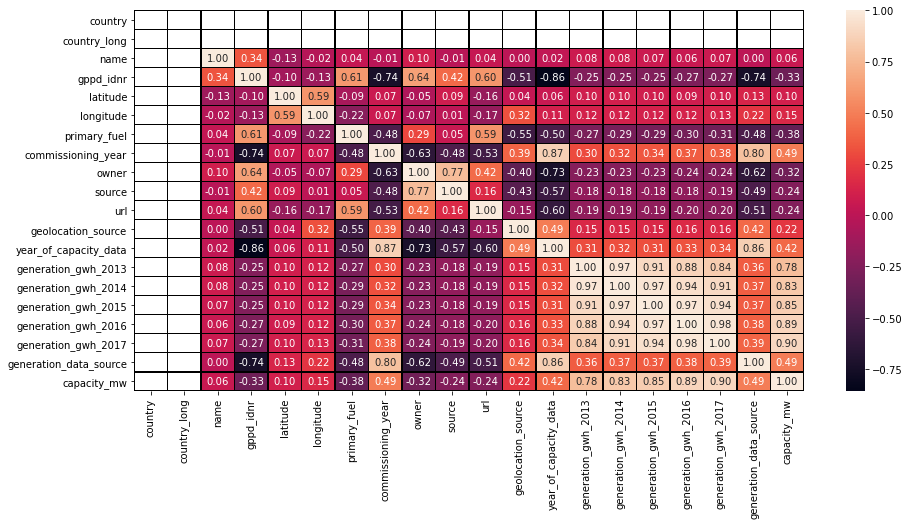

In [79]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

the generation of gwhs in the years 2013-2017 are highly positively correlated with target column(capacity_mw).There is multicollinearity exists here between source and url.so we can keep any one column and drop the other.because both impacts at same level on target variable

primary fuel is negatively correlated with the target column here

In [80]:
df.describe()

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,capacity_mw
count,908.0,908.0,908.00000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,0.0,0.0,453.50000,453.50000,20.122373,73.524278,3.205947,30.221366,53.373348,43.823789,94.429515,2.670705,0.572687,974.403892,1068.918194,1129.934756,1181.024405,1235.206195,0.495595,321.046378
std,0.0,0.0,262.26132,262.26132,7.661373,17.653769,2.281339,28.649548,84.838964,44.624092,70.352824,0.780510,0.494961,2716.222621,2924.098882,3103.712012,3129.230619,3185.504866,0.500256,580.221767
min,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,226.75000,226.75000,16.130025,73.812975,1.000000,0.000000,0.000000,22.000000,58.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.837500
50%,0.0,0.0,453.50000,453.50000,21.278850,76.492900,3.000000,33.000000,0.000000,22.000000,58.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
75%,0.0,0.0,680.25000,680.25000,25.183775,79.211600,6.000000,58.000000,96.250000,29.250000,115.250000,3.000000,1.000000,470.116200,570.095213,605.769975,669.808766,708.134037,1.000000,388.125000
max,0.0,0.0,907.00000,907.00000,34.649000,95.408000,7.000000,73.000000,280.000000,190.000000,303.000000,3.000000,1.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,1.000000,4760.000000


longitude and latitude column has less outliers since its diff between the 75% and max is less when comparing with generation of gwhs column.possibilty of outliers are there in generation of gwhs columns.
the numeric type columns doesnt seem to have mean and std dev much closer to Zero.

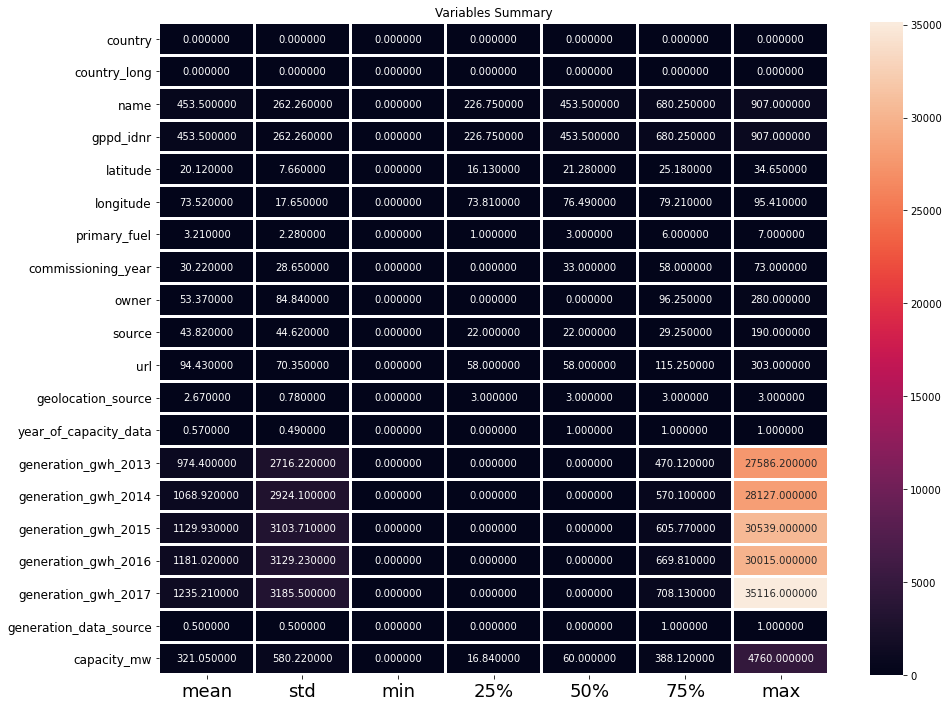

In [81]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

drop the columns since it showed null value correlation with target in heatmap

In [82]:
df=df.drop(['country','country_long'],axis=1)

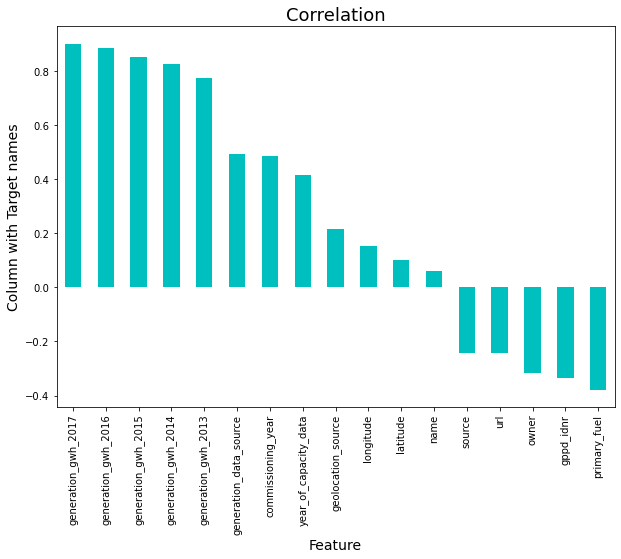

In [83]:
plt.figure(figsize=(10,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In above columns name,url,source referring to same information and source & url are multicollinear to each other.hence we can drop any one of the columns.
source,url,owner,gppd_idnr,primary_fuel are negatively correlated with the target column and all other columns are positively correlated with the target column

In [84]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
df.shape


(908, 18)

In [86]:
df.shape[1]


18

In [87]:
#calculates vif
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
    return(vif)


calc_vif(df)

,Variables,VIF FACTOR
0,name,8.258675
1,gppd_idnr,27.088912
2,latitude,13.380240
3,longitude,35.905461
4,primary_fuel,9.940921
5,commissioning_year,10.668920
6,owner,5.520551
7,source,5.747354
8,url,7.351759
9,geolocation_source,26.920875


source and url column are multicollinear to each other.the owner column,generation_data_source also refers to same information so keep any one of the column and drop the rest.

In [88]:
#drop column not needed

df=df.drop(['source','generation_data_source','owner'],axis=1)
df

,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw
0,0,658,28.1839,73.2407,6,66,128,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,2.5
1,1,520,24.7663,74.6090,1,0,173,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,98.0
2,2,854,21.9038,69.3732,7,0,205,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,39.2
3,3,0,23.8712,91.3602,2,59,58,3,1,631.777928,617.789264,843.747000,886.004428,663.774500,135.0
4,4,1,21.9603,82.4091,1,70,58,3,1,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,494,16.2949,77.3568,1,71,58,3,1,0.000000,0.000000,0.994875,233.596650,865.400000,1600.0
904,904,823,12.8932,78.1654,6,0,22,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
905,905,892,15.2758,75.5811,7,0,260,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,25.5
906,906,540,24.3500,73.7477,1,0,82,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,80.0


In [89]:
calc_vif(df)

,Variables,VIF FACTOR
0,name,8.084108
1,gppd_idnr,24.835028
2,latitude,13.044332
3,longitude,33.027944
4,primary_fuel,8.981096
5,commissioning_year,10.473253
6,url,7.192556
7,geolocation_source,24.942853
8,year_of_capacity_data,24.977455
9,generation_gwh_2013,29.154575


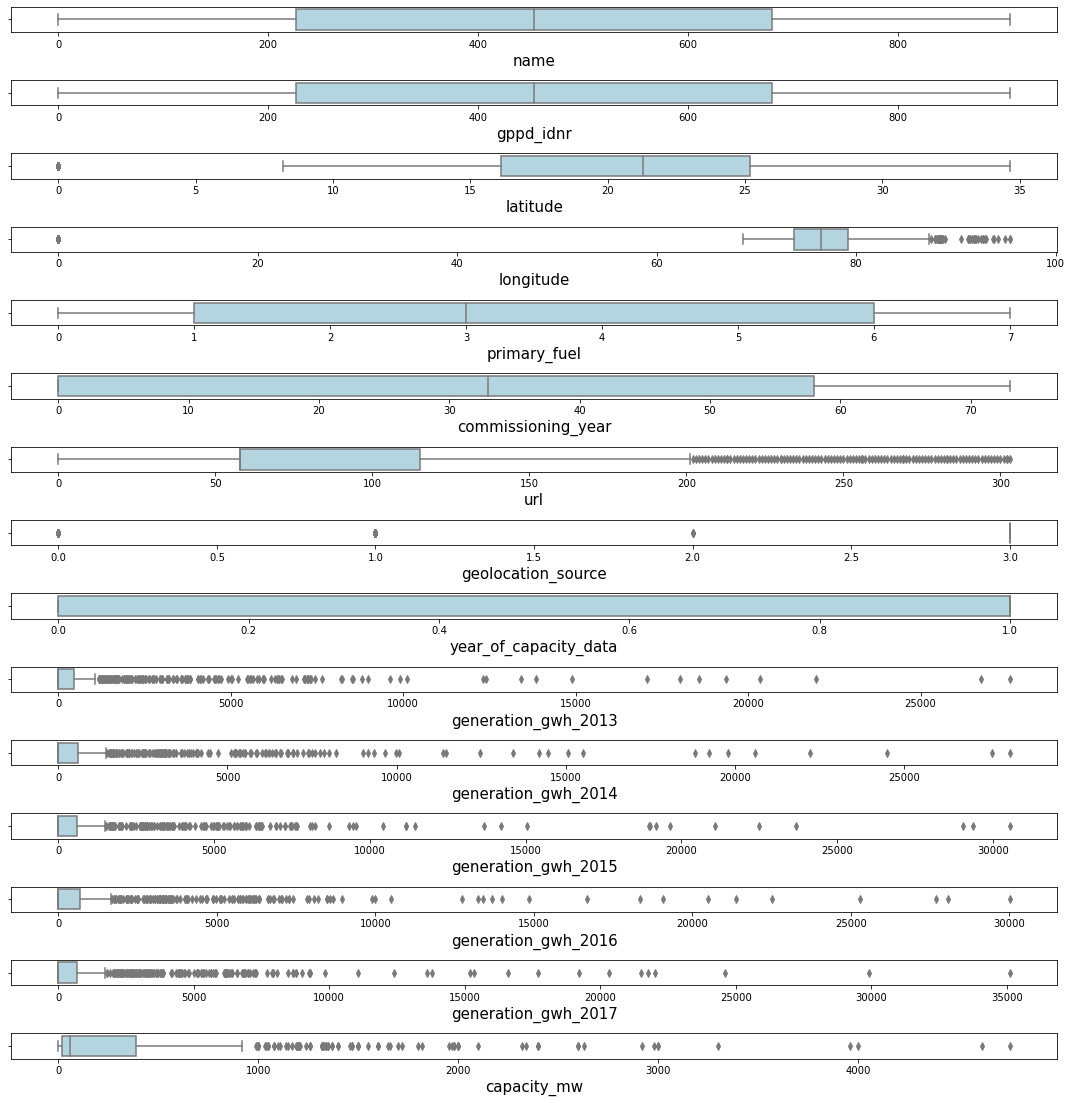

In [90]:
plt.figure(figsize= (15,20))
pltnum = 1
for i in df:
    if pltnum <=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(df[i],color = 'lightblue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

the generation of gwhs columns in years 2013-2017 has many outliers since its diff between 75% and max is high.other than that longitude column has outliers

In [91]:
#ckeck skewness
df.skew()

name                     0.000000
gppd_idnr                0.000000
latitude                -0.726161
longitude               -3.589962
primary_fuel             0.471141
commissioning_year       0.105846
url                      1.512258
geolocation_source      -2.069957
year_of_capacity_data   -0.294357
generation_gwh_2013      5.158053
generation_gwh_2014      4.989441
generation_gwh_2015      5.264211
generation_gwh_2016      4.988235
generation_gwh_2017      4.983065
capacity_mw              3.193257
dtype: float64

the values not in range -0.5 to +0.5 has skewness.here all generation of gwh columns are high in range.so it has outliers

#checking Z-score to remove outliers

In [92]:

import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape


(908, 15)

In [93]:
threshold=3
print(np.where(z>3))

(array([ 14,  15,  15,  15,  15,  25,  25,  43,  46,  68,  68,  73, 144,
       144, 144, 144, 144, 144, 159, 159, 179, 193, 193, 202, 209, 209,
       210, 210, 210, 210, 210, 210, 251, 251, 309, 309, 309, 309, 309,
       309, 330, 331, 333, 364, 365, 365, 365, 365, 365, 365, 376, 387,
       387, 421, 423, 431, 436, 441, 441, 467, 479, 480, 483, 484, 494,
       494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 503, 503,
       533, 533, 539, 541, 546, 546, 624, 649, 649, 649, 649, 649, 649,
       656, 656, 658, 658, 658, 658, 658, 658, 675, 675, 681, 696, 696,
       696, 696, 696, 706, 712, 713, 722, 722, 722, 722, 722, 725, 725,
       725, 725, 725, 727, 727, 727, 727, 727, 727, 732, 733, 742, 771,
       771, 774, 774, 775, 775, 776, 776, 777, 777, 785, 787, 787, 787,
       787, 787, 787, 789, 809, 809, 809, 809, 809, 809, 829, 829, 881,
       881, 881, 881, 881, 881, 885, 885, 887, 887], dtype=int64), array([ 3, 11, 12, 13, 14,  3,  7,  3,  3,  3,  7,  3,  9, 10, 11, 1

In [94]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(908, 15)
(839, 15)


some outliers got removed

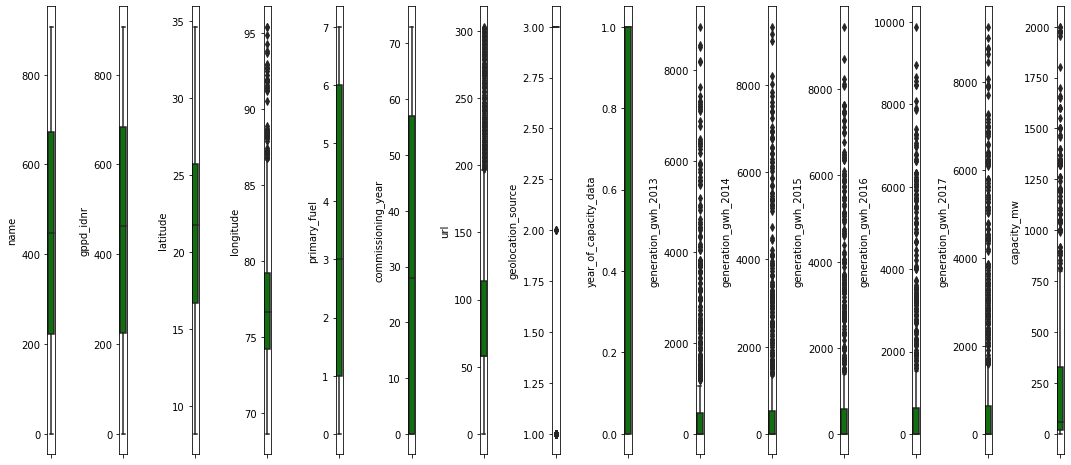

In [95]:
#checking outliers
collist=df_new.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [96]:
#finds data loss
loss_percent=(908-839)/(908*100)
print(loss_percent)

0.0007599118942731277


data loss percentage is very low.data is cleaned also

In [97]:
df_new


,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw
0,0,658,28.1839,73.2407,6,66,128,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,2.5
1,1,520,24.7663,74.6090,1,0,173,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,98.0
2,2,854,21.9038,69.3732,7,0,205,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,39.2
3,3,0,23.8712,91.3602,2,59,58,3,1,631.777928,617.789264,843.747000,886.004428,663.774500,135.0
4,4,1,21.9603,82.4091,1,70,58,3,1,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,494,16.2949,77.3568,1,71,58,3,1,0.000000,0.000000,0.994875,233.596650,865.400000,1600.0
904,904,823,12.8932,78.1654,6,0,22,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
905,905,892,15.2758,75.5811,7,0,260,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,25.5
906,906,540,24.3500,73.7477,1,0,82,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,80.0


In [98]:
df_new.shape

(839, 15)

In [99]:
#seggregate input data and output data
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [100]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.18348597,  0.78251129,  1.11577676, ..., -0.86437361,
        -0.8799177 , -0.88217114],
       [-2.16263348,  0.32056754,  0.5623527 , ..., -0.86437361,
        -0.8799177 , -0.88217114],
       [-2.1449077 ,  1.39476909,  0.10314499, ..., -0.86437361,
        -0.8799177 , -0.88217114],
       ...,
       [ 1.54911969,  1.50870931, -0.94213214, ..., -0.86437361,
        -0.8799177 , -0.88217114],
       [ 1.55199544,  0.38945252,  0.49531265, ..., -0.86437361,
        -0.8799177 , -0.88217114],
       [ 1.55487021,  1.46389723, -1.76099296, ..., -0.86437361,
        -0.8799177 , -0.88217114]])

In [101]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x = mmscaler.fit_transform(x)
x

array([[0.        , 0.79193249, 0.7476394 , ..., 0.        , 0.        ,
        0.        ],
       [0.00557799, 0.66723692, 0.61592128, ..., 0.        , 0.        ,
        0.        ],
       [0.01031958, 0.95720333, 0.5066272 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.99846175, 0.98795997, 0.25784521, ..., 0.        , 0.        ,
        0.        ],
       [0.99923101, 0.6858315 , 0.59996537, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.97586355, 0.06295161, ..., 0.        , 0.        ,
        0.        ]])

MODEL EVALUATION

REGRESSION :

Linear Regression

In [102]:
#Linear Regression
#model fitting
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split



In [103]:
#getting best accuracy with help of selecting random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:{r2_score(y_train,pred_train)*100}")
    print(f"At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)*100}")
    print("\n")
    
    
    
    

At random state 0,the training accuracy is:55.294857922762034
At random state 0,the testing accuracy is:47.10258204440717


At random state 1,the training accuracy is:51.484430260309956
At random state 1,the testing accuracy is:61.78733806338644


At random state 2,the training accuracy is:53.27971887061618
At random state 2,the testing accuracy is:54.5794027970165


At random state 3,the training accuracy is:53.5689491908403
At random state 3,the testing accuracy is:53.56105067957239


At random state 4,the training accuracy is:54.92652479455658
At random state 4,the testing accuracy is:45.435172067404686


At random state 5,the training accuracy is:52.28338777347001
At random state 5,the testing accuracy is:57.26190170077785


At random state 6,the training accuracy is:53.371111798750846
At random state 6,the testing accuracy is:52.71012646162659


At random state 7,the training accuracy is:53.939224927389326
At random state 7,the testing accuracy is:52.03463493616678


At random sta

In [104]:
#evaluation metrics

print("Accuracy:", r2_score(y_test,pred_test)*100)

Accuracy: 50.67386295105292


In [105]:
#cross validation at random state
Train_accuracy=(r2_score(y_train,pred_train)*100)
Test_accuracy=r2_score(y_test,pred_test)*100
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()*100
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for Training is {Train_accuracy} and accuracy score for Testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 the cv score is 47.82479653035029 and accuracy score for Training is 54.40093014103336 and accuracy score for Testing is 50.67386295105292


At cross fold 3 the cv score is 49.04831448030666 and accuracy score for Training is 54.40093014103336 and accuracy score for Testing is 50.67386295105292


At cross fold 4 the cv score is 49.91313262770444 and accuracy score for Training is 54.40093014103336 and accuracy score for Testing is 50.67386295105292


At cross fold 5 the cv score is 50.79725605174381 and accuracy score for Training is 54.40093014103336 and accuracy score for Testing is 50.67386295105292


At cross fold 6 the cv score is 51.373261200167505 and accuracy score for Training is 54.40093014103336 and accuracy score for Testing is 50.67386295105292


At cross fold 7 the cv score is 49.964272996872175 and accuracy score for Training is 54.40093014103336 and accuracy score for Testing is 50.67386295105292


At cross fold 8 the cv score is 51.53038386314637 and ac

parameter tuning

In [106]:
#perform gridsearchcv and cross val score on LinearRegression
from sklearn.model_selection import GridSearchCV

parameters={ 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False], 'n_jobs':[None,1,-1], 'positive':[True,False]}
lr=LinearRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}


In [107]:
lr=LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None, normalize= True, positive= False)
lr.fit(x_train,y_train)
pred_test_lr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
lr_score = lr.score(x_train,y_train)
lr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 50.67386295105292
score of model is: 54.40093014103336


In [108]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 50.79725605174381


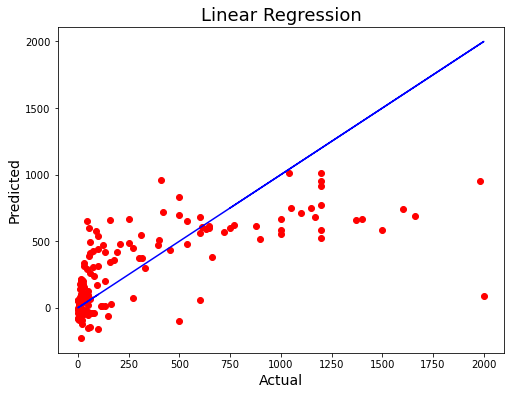

In [109]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [110]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test))
print("mean squared error",mean_squared_error(y_test,pred_test))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test)))
print("r2_score is",r2_score(y_test,pred_test)*100)

mean absolute error 195.04468307052832
mean squared error 96475.53617364567
Root mean squared error 310.6051129225752
r2_score is 50.67386295105292


LASSO REGRESSION

parameter tuning

In [111]:
#perform gridsearchcv and cross val score on lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [112]:
ls=Lasso(alpha=1,random_state=0,fit_intercept= True, normalize= False,tol= 0.001)
ls.fit(x_train,y_train)
pred_test_ls=ls.predict(x_test)
pred_train_ls=ls.predict(x_train)
ls_score = ls.score(x_train,y_train)
ls_acc_score=r2_score(y_test,pred_test_ls)
print("Accuracy score is:",ls_acc_score*100)


Accuracy score is: 50.159126788192566


In [113]:
#checks cv score
for u in range(2,10):
    cv_score_ls=cross_val_score(ls,x,y,cv=5)
    cv_mean_ls=cv_score_ls.mean()
    print("At cv :-",j )
    print("cv_score is:",cv_mean_ls*100)
    print("accuracy score---r2_score is",ls_acc_score*100)

At cv :- 9
cv_score is: 51.36022204552276
accuracy score---r2_score is 50.159126788192566
At cv :- 9
cv_score is: 51.36022204552276
accuracy score---r2_score is 50.159126788192566
At cv :- 9
cv_score is: 51.36022204552276
accuracy score---r2_score is 50.159126788192566
At cv :- 9
cv_score is: 51.36022204552276
accuracy score---r2_score is 50.159126788192566
At cv :- 9
cv_score is: 51.36022204552276
accuracy score---r2_score is 50.159126788192566
At cv :- 9
cv_score is: 51.36022204552276
accuracy score---r2_score is 50.159126788192566
At cv :- 9
cv_score is: 51.36022204552276
accuracy score---r2_score is 50.159126788192566
At cv :- 9
cv_score is: 51.36022204552276
accuracy score---r2_score is 50.159126788192566


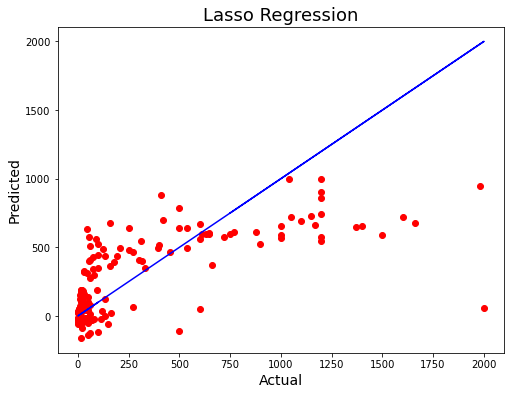

In [114]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

In [115]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_ls))
print("mean squared error",mean_squared_error(y_test,pred_test_ls))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_ls)))
print("r2_score is",r2_score(y_test,pred_test_ls)*100)

mean absolute error 193.08826165365636
mean squared error 97482.29344820457
Root mean squared error 312.2215454580362
r2_score is 50.159126788192566


RANDOM FOREST REGRESSION

parameter tuning

In [116]:
#perform gridsearchcv and cross val score on RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['friedman_mse','mae'],'max_features':["auto","sqrt","log2"],'bootstrap': [True, False],'min_samples_split':[1,2],'min_samples_leaf':[1,2]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                                                      


{'bootstrap': True, 'criterion': 'mae', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [117]:
rf=RandomForestRegressor(criterion="mae",max_features="log2",bootstrap= True,min_samples_leaf= 2, min_samples_split= 2)
rf.fit(x_train,y_train)
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
rf_score = rf.score(x_train,y_train)
rf_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 50.67386295105292
score of model is: 93.08032675464779


In [118]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 79.76386294708325


In [119]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rf))
print("mean squared error",mean_squared_error(y_test,pred_test_rf))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("r2_score is",r2_score(y_test,pred_test_rf)*100)

mean absolute error 105.78666226190477
mean squared error 61524.23200608079
Root mean squared error 248.0407869808528
r2_score is 68.54381099991062


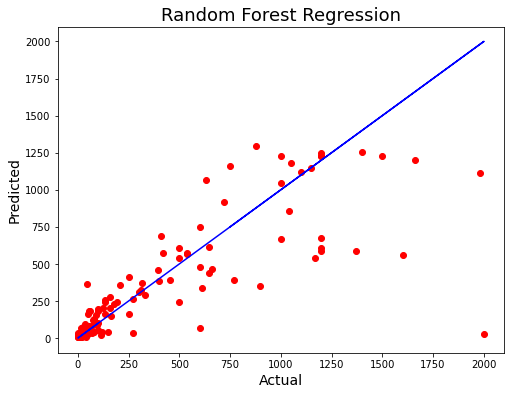

In [120]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Random Forest Regression',fontsize=18)
plt.show()

RIDGE REGRESSION

In [121]:
#perform gridsearchcv and cross val score on Ridge Regressor
from sklearn.linear_model import Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 1, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [122]:
rd=Ridge(alpha=0.001,fit_intercept=True,normalize=True,random_state=0,tol=0.001)
rd.fit(x_train,y_train)
pred_test_rd=rd.predict(x_test)
pred_train_rd=rd.predict(x_train)
rd_score = rd.score(x_train,y_train)
rd_acc_score=r2_score(y_test,pred_test_rd)
print("Accuracy score is:",rd_acc_score*100)
print("score of model is:",rd_score*100)

Accuracy score is: 50.64500986338174
score of model is: 54.39973112304099


In [123]:
cv_score_rd=cross_val_score(rd,x,y,cv=5)
cv_mean_rd=cv_score_rd.mean()
print("cv_mean is:",cv_mean_rd*100)

cv_mean is: 50.87802443422843


In [124]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rd))
print("mean squared error",mean_squared_error(y_test,pred_test_rd))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rd)))
print("r2_score is",r2_score(y_test,pred_test_rd)*100)

mean absolute error 195.13738237222282
mean squared error 96531.96907656241
Root mean squared error 310.6959431285874
r2_score is 50.64500986338174


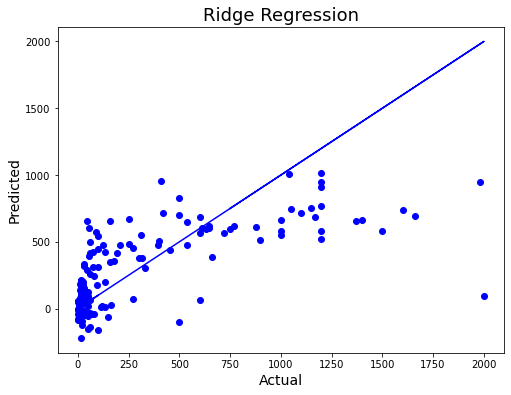

In [125]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rd,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

DECISION TREE REGRESSOR

In [126]:
#perform gridsearchcv and cross val score on Decison Tree Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae','poisson'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                  

{'criterion': 'poisson', 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'random_state': 0, 'splitter': 'best'}


In [127]:
dt=DecisionTreeRegressor(criterion='mse',max_features= 'auto', min_weight_fraction_leaf= 0.1, random_state= 1, splitter= 'random')
dt.fit(x_train,y_train)
pred_test_dt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
dt_score = dt.score(x_train,y_train)
dt_acc_score=r2_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)


Accuracy score is: 46.1473164822633
score of model is: 58.88914862656587


In [128]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 56.987823489323674


In [129]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_dt))
print("mean squared error",mean_squared_error(y_test,pred_test_dt))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_dt)))
print("r2_score is",r2_score(y_test,pred_test_dt)*100)

mean absolute error 168.47663172445053
mean squared error 105328.87486420754
Root mean squared error 324.54410311112963
r2_score is 46.1473164822633


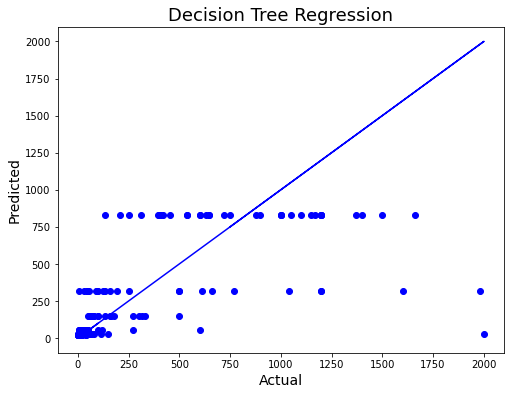

In [130]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_dt,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

GRADIENT BOOSTING REGRESSOR

In [131]:
#perform gridsearchcv and cross val score on  GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100],'criterion':['friedman_mse','mse'],'learning_rate':[0.05],'max_depth' : [1,3,5,7,9,11,12],'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 12, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100}


In [132]:

gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=100,learning_rate= 0.05,max_depth= 5, min_weight_fraction_leaf= 0.1)
gbr.fit(x_train,y_train)
pred_test_gbr=gbr.predict(x_test)
pred_train_gbr=gbr.predict(x_train)
gbr_score = gbr.score(x_train,y_train)
gbr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",gbr_acc_score*100)
print("score of model is:",gbr_score*100)

Accuracy score is: 50.67386295105292
score of model is: 83.55996930389


In [133]:
cv_score_gbr=cross_val_score(gbr,x,y,cv=5)
cv_mean_gbr=cv_score_gbr.mean()
print("cv_mean is:",cv_mean_gbr*100)

cv_mean is: 77.44157438309573


In [134]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_gbr))
print("mean squared error",mean_squared_error(y_test,pred_test_gbr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_gbr)))
print("r2_score is",r2_score(y_test,pred_test_gbr)*100)

mean absolute error 116.98656065144206
mean squared error 68498.15916719365
Root mean squared error 261.7215298121147
r2_score is 64.97817249131224


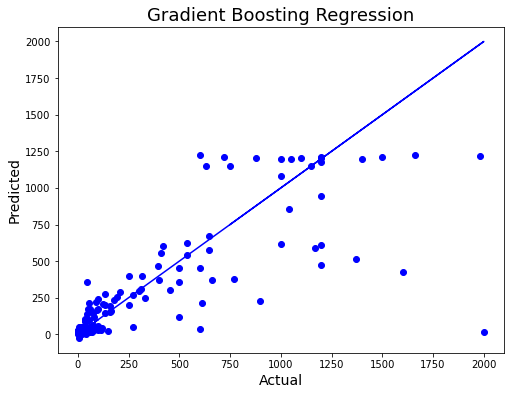

In [135]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_gbr,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Gradient Boosting Regression',fontsize=18)
plt.show()

SUPPORT VECTOR REGRESSOR

In [136]:
#perform gridsearchcv and cross val score on Support Vector Regressor
from sklearn.svm import SVR
parameters ={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale', 'auto'],'tol':[0.01,0.0001,0.001],'shrinking':[True,False],'degree':[3,4,5],'max_iter':[1,2,-1]}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': False, 'tol': 0.01}


In [137]:
sv=SVR(kernel='poly',gamma='scale',degree= 5, max_iter= -1, shrinking= False, tol= 0.0001)
sv.fit(x_train,y_train)
pred_test_sv=sv.predict(x_test)
pred_train_sv=sv.predict(x_train)
sv_score = sv.score(x_train,y_train)
sv_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",sv_acc_score*100)
print("score of model is:",sv_score*100)

Accuracy score is: 50.67386295105292
score of model is: 73.43546906185263


In [138]:
cv_score_sv=cross_val_score(sv,x,y,cv=5)
cv_mean_sv=cv_score_sv.mean()
print("cv_mean is:",cv_mean_sv*100)

cv_mean is: 69.13698159754425


In [139]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_sv))
print("mean squared error",mean_squared_error(y_test,pred_test_sv))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_sv)))
print("r2_score is",r2_score(y_test,pred_test_sv)*100)

mean absolute error 133.6226752953511
mean squared error 78085.26475738715
Root mean squared error 279.4374075842158
r2_score is 60.076464732016134


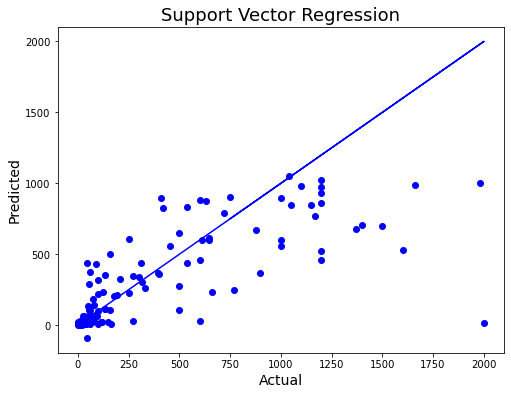

In [140]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_sv,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

ELASTIC NET REGRESSION(COMBINATION OF L1 AND L2)

In [141]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
enr=ElasticNet()
clf=GridSearchCV(enr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [142]:
enr=ElasticNet(alpha=0.0001,fit_intercept= True,normalize= False, random_state= 0, tol= 0.001)
enr.fit(x_train,y_train)
pred_test_enr=enr.predict(x_test)
pred_train_enr=enr.predict(x_train)
enr_score = enr.score(x_train,y_train)
enr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",enr_acc_score*100)
print("score of model is:",enr_score*100)

Accuracy score is: 50.67386295105292
score of model is: 54.40084737951623


In [143]:
cv_score_enr=cross_val_score(enr,x,y,cv=5)
cv_mean_enr=cv_score_enr.mean()
print("cv_mean is:",cv_mean_enr*100)

cv_mean is: 50.82781233341691


In [144]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_enr))
print("mean squared error",mean_squared_error(y_test,pred_test_enr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_enr)))
print("r2_score is",r2_score(y_test,pred_test_enr)*100)

mean absolute error 195.03019786023472
mean squared error 96489.46062271517
Root mean squared error 310.62752714902
r2_score is 50.666743640703636


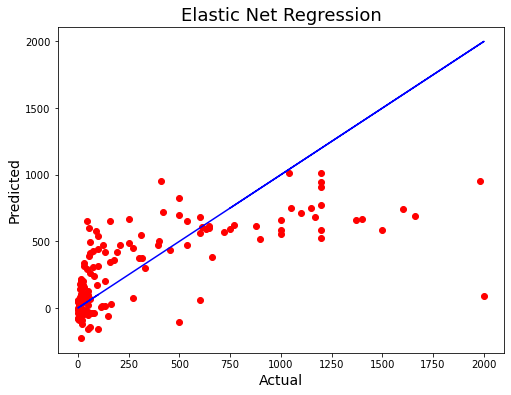

In [145]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_enr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Elastic Net Regression',fontsize=18)
plt.show()

CONCLUSION

OUTPUT
 


In [146]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


,Original,Predicted
0,100.00,179.91327
1,14.85,22.86200
2,35.10,49.24715
3,50.40,29.54875
4,9.90,17.14625
...,...,...
163,270.00,264.70457
164,4.50,13.61500
165,600.00,747.54200
166,78.90,39.49185


In [147]:
import pickle
filename='Global_Power_Plant_Database_rf.pkl'
pickle.dump(rf,open(filename,'wb'))


In [148]:
models=['Linear Regression','Lasso regression','RandomForestRegressor','Ridge Regressor','Decison Tree Regressor','GradientBoostingRegressor'
,'Support Vector Regressor','ElasticNet Regression']
        


In [149]:
scores=[ r2_score(y_test,pred_test)*100,ls_acc_score*100,rf_acc_score*100,rd_acc_score*100,dt_acc_score*100,gbr_acc_score*100,sv_acc_score*100,enr_acc_score*100]
scores

[50.67386295105292,
 50.159126788192566,
 50.67386295105292,
 50.64500986338174,
 46.1473164822633,
 50.67386295105292,
 50.67386295105292,
 50.67386295105292]

In [150]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8]

In [151]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.sort_values(by='Scores', ascending=False).style.hide_index()

Nos,Model Names,Scores
1,Linear Regression,50.673863
3,RandomForestRegressor,50.673863
6,GradientBoostingRegressor,50.673863
7,Support Vector Regressor,50.673863
8,ElasticNet Regression,50.673863
4,Ridge Regressor,50.645010
2,Lasso regression,50.159127
5,Decison Tree Regressor,46.147316


CONCLUSION

From the above models,Linear Regression,RandomForestRegressor,GradientBoostingRegressor,Support Vector Regressor,ElasticNet Regression performs the best.so we can save any one of the best model from this.we are choosing here RandomForestRegressor model because it has fine tuning parameters which traverse to depth and it can yield good result in any scenario.and the data are best fit to the line than others

hence the generation of capacity_mw of the power plant primarily depends on generation of Gwh,primary_fuel and the geolocation of the plant

CLASSIFICATION APPROACH

In [152]:
df_new

,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw
0,0,658,28.1839,73.2407,6,66,128,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,2.5
1,1,520,24.7663,74.6090,1,0,173,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,98.0
2,2,854,21.9038,69.3732,7,0,205,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,39.2
3,3,0,23.8712,91.3602,2,59,58,3,1,631.777928,617.789264,843.747000,886.004428,663.774500,135.0
4,4,1,21.9603,82.4091,1,70,58,3,1,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,494,16.2949,77.3568,1,71,58,3,1,0.000000,0.000000,0.994875,233.596650,865.400000,1600.0
904,904,823,12.8932,78.1654,6,0,22,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
905,905,892,15.2758,75.5811,7,0,260,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,25.5
906,906,540,24.3500,73.7477,1,0,82,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,80.0


In [153]:
v=df_new[list(df_new.columns)[4]] 
df_new=df_new.drop(['primary_fuel'],axis=1) 
df_new

,name,gppd_idnr,latitude,longitude,commissioning_year,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw
0,0,658,28.1839,73.2407,66,128,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,2.5
1,1,520,24.7663,74.6090,0,173,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,98.0
2,2,854,21.9038,69.3732,0,205,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,39.2
3,3,0,23.8712,91.3602,59,58,3,1,631.777928,617.789264,843.747000,886.004428,663.774500,135.0
4,4,1,21.9603,82.4091,70,58,3,1,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,494,16.2949,77.3568,71,58,3,1,0.000000,0.000000,0.994875,233.596650,865.400000,1600.0
904,904,823,12.8932,78.1654,0,22,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
905,905,892,15.2758,75.5811,0,260,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,25.5
906,906,540,24.3500,73.7477,0,82,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,80.0


In [154]:
df_new.insert(14,'primary_fuel',v) 
df_new


,name,gppd_idnr,latitude,longitude,commissioning_year,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw,primary_fuel
0,0,658,28.1839,73.2407,66,128,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,2.5,6
1,1,520,24.7663,74.6090,0,173,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,98.0,1
2,2,854,21.9038,69.3732,0,205,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,39.2,7
3,3,0,23.8712,91.3602,59,58,3,1,631.777928,617.789264,843.747000,886.004428,663.774500,135.0,2
4,4,1,21.9603,82.4091,70,58,3,1,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1800.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,494,16.2949,77.3568,71,58,3,1,0.000000,0.000000,0.994875,233.596650,865.400000,1600.0,1
904,904,823,12.8932,78.1654,0,22,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,6
905,905,892,15.2758,75.5811,0,260,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,25.5,7
906,906,540,24.3500,73.7477,0,82,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,80.0,1


In [155]:
df_new.corr()

,name,gppd_idnr,latitude,longitude,commissioning_year,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw,primary_fuel
name,1.000000,0.328095,-0.137035,0.013120,-0.000133,0.026347,0.031128,0.029100,0.060646,0.057391,0.029087,0.028324,0.032607,0.041400,0.034662
gppd_idnr,0.328095,1.000000,-0.107076,-0.391778,-0.749493,0.577849,-0.482489,-0.857945,-0.335981,-0.346774,-0.373604,-0.375194,-0.375228,-0.403249,0.595087
latitude,-0.137035,-0.107076,1.000000,0.028039,0.123428,-0.136056,-0.186734,0.080481,0.079842,0.083326,0.076083,0.062636,0.085486,0.051116,-0.012385
longitude,0.013120,-0.391778,0.028039,1.000000,0.423344,-0.312894,0.251213,0.434726,0.143442,0.147277,0.175988,0.210407,0.221318,0.203789,-0.353766
commissioning_year,-0.000133,-0.749493,0.123428,0.423344,1.000000,-0.513196,0.405090,0.882090,0.376648,0.410448,0.455755,0.488406,0.505116,0.566856,-0.471837
url,0.026347,0.577849,-0.136056,-0.312894,-0.513196,1.000000,-0.022806,-0.579498,-0.231340,-0.236919,-0.243868,-0.247197,-0.251061,-0.268389,0.564425
geolocation_source,0.031128,-0.482489,-0.186734,0.251213,0.405090,-0.022806,1.000000,0.465558,0.185854,0.190337,0.195919,0.198594,0.201698,0.245852,-0.509106
year_of_capacity_data,0.029100,-0.857945,0.080481,0.434726,0.882090,-0.579498,0.465558,1.000000,0.399208,0.408836,0.420827,0.426572,0.433239,0.482103,-0.472735
generation_gwh_2013,0.060646,-0.335981,0.079842,0.143442,0.376648,-0.231340,0.185854,0.399208,1.000000,0.955813,0.866246,0.758441,0.705531,0.654686,-0.298798
generation_gwh_2014,0.057391,-0.346774,0.083326,0.147277,0.410448,-0.236919,0.190337,0.408836,0.955813,1.000000,0.929457,0.830857,0.784933,0.707455,-0.317595


gppd_idnr column is the most positively correlated with the target column and geolocation_source is the most negatively correlated with the target column.from this we can conclude that primary fuel depends on the geolocation and it depends on mostly the geolocations renewable source of fuel 

<AxesSubplot:>

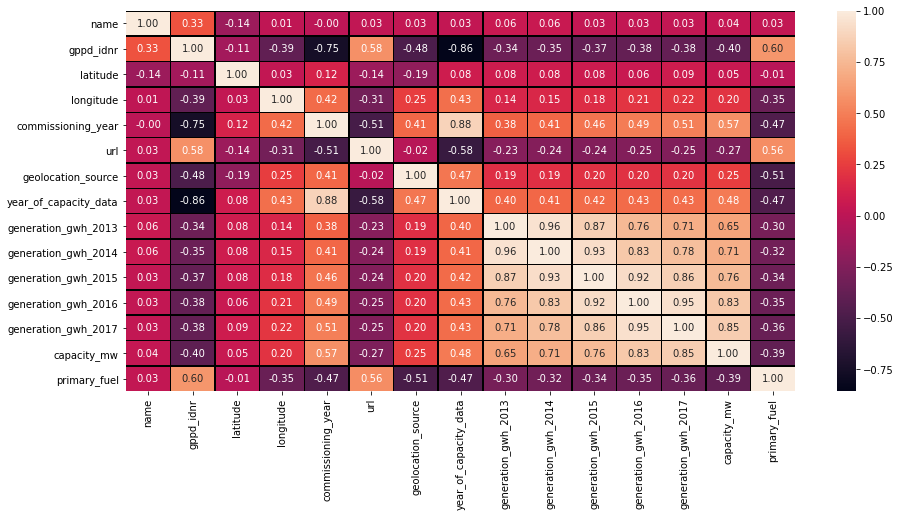

In [156]:
plt.figure(figsize=(15,7))
sns.heatmap(df_new.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

gppd_idnr is the most positively correlated with the target column and geo_location source is the most negatively correlated with the target column

In [157]:
df_new.describe()

,name,gppd_idnr,latitude,longitude,commissioning_year,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw,primary_fuel
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,449.678188,455.970203,21.184918,77.363754,29.128725,93.973778,2.711561,0.560191,710.772906,768.541646,806.505962,850.246276,896.032075,268.598464,3.197855
std,262.745526,262.035347,6.306141,4.892000,28.539177,70.101779,0.699640,0.496660,1578.539147,1666.639921,1699.131186,1767.159371,1833.660973,417.776804,2.271846
min,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,225.500000,16.711800,74.245750,0.000000,58.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000
50%,447.000000,463.000000,21.757000,76.651100,28.000000,58.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,3.000000
75%,672.500000,682.500000,25.729000,79.214600,57.000000,113.500000,3.000000,1.000000,459.665575,533.731775,569.248800,632.045785,640.196675,330.250000,6.000000
max,907.000000,907.000000,34.649000,95.408000,73.000000,303.000000,3.000000,1.000000,8965.595000,9335.000000,9453.000000,9887.200000,9271.610000,2000.000000,7.000000


ongitude and latitude column has less outliers since its diff between the 75% and max is less when comparing with generation of gwhs column.possibilty of outliers are there in generation of gwhs columns. the numeric type columns doesnt seem to have mean and std dev much closer to Zero.

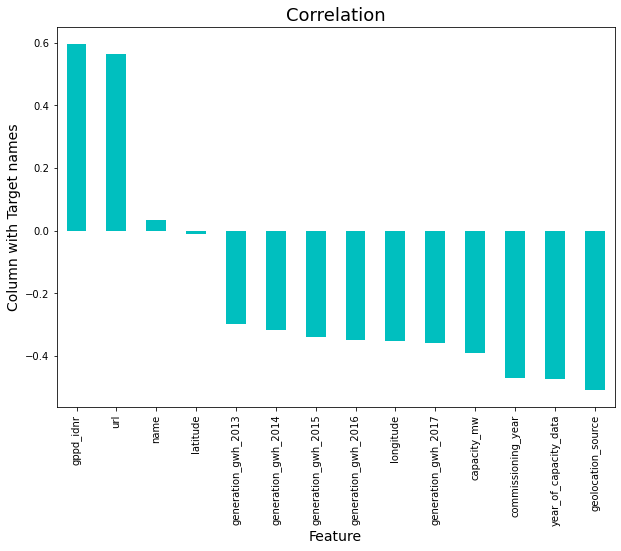

In [158]:
plt.figure(figsize=(10,7))
df_new.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

gppd_idnr is the most positively correlated with the target column and geo_location source is the most negatively correlated with the target column

In [159]:
#seggregate input data and output data
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [160]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.18348597,  0.78251129,  1.11577676, ..., -0.8799177 ,
        -0.88217114, -1.69204893],
       [-2.16263348,  0.32056754,  0.5623527 , ..., -0.8799177 ,
        -0.88217114,  0.19902187],
       [-2.1449077 ,  1.39476909,  0.10314499, ..., -0.8799177 ,
        -0.88217114, -0.30232678],
       ...,
       [ 1.54911969,  1.50870931, -0.94213214, ..., -0.8799177 ,
        -0.88217114, -0.53626062],
       [ 1.55199544,  0.38945252,  0.49531265, ..., -0.8799177 ,
        -0.88217114,  0.08793264],
       [ 1.55487021,  1.46389723, -1.76099296, ..., -0.8799177 ,
        -0.88217114, -0.77053866]])

In [161]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x = mmscaler.fit_transform(x)
x

array([[0.        , 0.79193249, 0.7476394 , ..., 0.        , 0.        ,
        0.17212096],
       [0.00557799, 0.66723692, 0.61592128, ..., 0.        , 0.        ,
        0.61701899],
       [0.01031958, 0.95720333, 0.5066272 , ..., 0.        , 0.        ,
        0.49907045],
       ...,
       [0.99846175, 0.98795997, 0.25784521, ..., 0.        , 0.        ,
        0.4440346 ],
       [0.99923101, 0.6858315 , 0.59996537, ..., 0.        , 0.        ,
        0.59088386],
       [1.        , 0.97586355, 0.06295161, ..., 0.        , 0.        ,
        0.38891776]])

MODEL EVALUATION

CLASSIFICATION

In [162]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [163]:
lr=LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train,pred_train)*100,1)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100,1)
        

At random state  22 model performs well
At random state:- 22
Training r2_score is :- 76.75111773472429 1
Testing r2_score is :- 76.78571428571429 1
At random state  25 model performs well
At random state:- 25
Training r2_score is :- 76.15499254843517 1
Testing r2_score is :- 76.19047619047619 1


In [164]:
#cv score

from sklearn.model_selection import cross_val_score
acc_score=accuracy_score(y_test,pred_test)
for j in range(2,10):
    cross_V_score=cross_val_score(lr,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score*100)
    print("accuracy score is:",acc_score*100)
    print("\n")
        

At cv:- 2
cross validation score is: 72.02380952380952
accuracy score is: 72.02380952380952


At cv:- 3
cross validation score is: 72.02380952380952
accuracy score is: 72.02380952380952


At cv:- 4
cross validation score is: 72.02380952380952
accuracy score is: 72.02380952380952


At cv:- 5
cross validation score is: 72.02380952380952
accuracy score is: 72.02380952380952


At cv:- 6
cross validation score is: 72.02380952380952
accuracy score is: 72.02380952380952


At cv:- 7
cross validation score is: 72.02380952380952
accuracy score is: 72.02380952380952


At cv:- 8
cross validation score is: 72.02380952380952
accuracy score is: 72.02380952380952


At cv:- 9
cross validation score is: 72.02380952380952
accuracy score is: 72.02380952380952




parameter tuning:

In [165]:
#performs GridsearchCV logistic regression
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1', 'l2'],'fit_intercept':[True,False],'random_state':[0,1],'n_jobs':[-1], 'tol':[0.0001,0.001]}
lr=LogisticRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'n_jobs': -1, 'penalty': 'l2', 'random_state': 0, 'tol': 0.0001}


In [166]:
lr=LogisticRegression(fit_intercept= True,n_jobs=-1,penalty='l2', random_state=0, tol= 0.0001)
lr.fit(x_train,y_train)
pred_test_lr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
lr_score = lr.score(x_train,y_train)
lr_acc_score=accuracy_score(y_test,pred_test_lr)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 72.02380952380952
score of model is: 77.64530551415797


In [167]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 76.39791844881665


In [168]:
print(classification_report(y_test, pred_test_lr)) 

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.58      0.81      0.68        43
           2       0.00      0.00      0.00        14
           3       0.69      0.73      0.71        45
           4       0.00      0.00      0.00         4
           5       1.00      0.25      0.40         4
           6       1.00      1.00      1.00        25
           7       0.78      1.00      0.88        21

    accuracy                           0.72       168
   macro avg       0.61      0.54      0.54       168
weighted avg       0.66      0.72      0.68       168



In [169]:
print(confusion_matrix(y_test,pred_test_lr))

[[ 6  5  0  0  0  0  0  1]
 [ 0 35  0  7  0  0  0  1]
 [ 1  5  0  7  0  0  0  1]
 [ 0 12  0 33  0  0  0  0]
 [ 0  2  0  1  0  0  0  1]
 [ 0  1  0  0  0  1  0  2]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 21]]


In [170]:
print(accuracy_score(y_test,pred_test_lr)*100)

72.02380952380952


AUc-ROC Curve

NOTE:  auc roc curve doesnot support categorical data

RANDOM FOREST CLASSIFIER  

In [171]:
# importing modules

from sklearn.ensemble import RandomForestClassifier

#creating RandomForestClassifier constructor
rf = RandomForestClassifier(random_state=5)
# fit data
rf.fit(x_train,y_train)
# predicting score
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
#calculates score of the model using score method
rf_score = rf.score(x_test,y_test)
print('score of model is : ',rf_score*100)

score of model is :  79.16666666666666


In [172]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_rf)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_rf)*100)

        

Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 79.16666666666666


In [173]:
#choosing best Random state
for i in range(0,5):
    rf.fit(x_train, y_train)
    pred_train_rf=rf.predict(x_train)
    pred_test_rf=rf.predict(x_test)
    if round(accuracy_score(y_train,pred_train_rf)*100,1)== round(accuracy_score(y_test,pred_test_rf)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train,pred_train_rf)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test_rf)*100)

In [174]:
print("accuracy score is:",accuracy_score(y_test,pred_test_rf)*100)

#cross validation 
from sklearn.model_selection import cross_val_score
acc_score_rf=accuracy_score(y_test,pred_test_rf)
for j in range(2,10):
    cross_V_score=cross_val_score(rf,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score_rf*100)
    print("accuracy score is:",acc_score_rf*100)
    print("\n")    

accuracy score is: 79.16666666666666
At cv:- 2
cross validation score is: 79.16666666666666
accuracy score is: 79.16666666666666


At cv:- 3
cross validation score is: 79.16666666666666
accuracy score is: 79.16666666666666


At cv:- 4
cross validation score is: 79.16666666666666
accuracy score is: 79.16666666666666


At cv:- 5
cross validation score is: 79.16666666666666
accuracy score is: 79.16666666666666


At cv:- 6
cross validation score is: 79.16666666666666
accuracy score is: 79.16666666666666


At cv:- 7
cross validation score is: 79.16666666666666
accuracy score is: 79.16666666666666


At cv:- 8
cross validation score is: 79.16666666666666
accuracy score is: 79.16666666666666


At cv:- 9
cross validation score is: 79.16666666666666
accuracy score is: 79.16666666666666




    
parameter tuning

In [175]:
#performs GridSearchCV on RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entropy'],'min_impurity_decrease':[0.0,0.1],'random_state':[0,1],'min_weight_fraction_leaf':[0.1,0.2],'bootstrap':[True,False]}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.1, 'random_state': 0}


In [176]:
rf=RandomForestClassifier(criterion="entropy",random_state=1,bootstrap="True",min_weight_fraction_leaf= 0.1,min_impurity_decrease=0.0)
rf.fit(x_train,y_train)
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
rf_score = rf.score(x_train,y_train)
rf_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 72.02380952380952
score of model is: 76.30402384500745


In [177]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 74.48959224408325


In [178]:
print(confusion_matrix(y_test,pred_test_rf))

[[ 0 12  0  0  0  0  0  0]
 [ 0 32  0 10  0  0  0  1]
 [ 0  7  0  7  0  0  0  0]
 [ 0  9  0 36  0  0  0  0]
 [ 0  2  0  1  0  0  0  1]
 [ 0  3  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 21]]


In [179]:
print(classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.49      0.74      0.59        43
           2       0.00      0.00      0.00        14
           3       0.65      0.80      0.72        45
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        25
           7       0.91      1.00      0.95        21

    accuracy                           0.68       168
   macro avg       0.38      0.44      0.41       168
weighted avg       0.56      0.68      0.61       168



DECISION TREE CLASSIFIER

In [180]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(random_state=1)
dtc.fit(x_train, y_train)
pred_test_dtc = dtc.predict(x_test)
pred_train_dtc = dtc.predict(x_train)
dtc_score = dtc.score(x_test,y_test)
print('score of model is : ',dtc_score*100)


print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_dtc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_dtc)*100)

score of model is :  77.38095238095238
Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 77.38095238095238


parameter tuning

In [181]:
#perform gridsearchcv and cross val score on Decison Tree DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'criterion':['gini', 'entropy'],'splitter':['best','random'],'random_state':[0,1],'min_impurity_decrease':[0.0],'min_samples_split': [2,3],'min_samples_leaf':[1,2] }
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}


In [182]:
dt=DecisionTreeClassifier(criterion='gini',max_features= 'auto',max_depth= 11 , random_state= 3, splitter= 'random',min_samples_leaf= 3,min_samples_split= 2)
dt.fit(x_train,y_train)
pred_test_dt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
dt_score = dt.score(x_train,y_train)
dt_acc_score=accuracy_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)

Accuracy score is: 67.26190476190477
score of model is: 78.09239940387481


In [183]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 72.10935272312517


In [184]:
print(confusion_matrix(y_test,pred_test_dtc))

[[10  2  0  0  0  0  0  0]
 [ 1 34  5  2  1  0  0  0]
 [ 0  6  3  4  0  1  0  0]
 [ 0  6  3 36  0  0  0  0]
 [ 0  1  0  1  1  0  0  1]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 21]]


In [185]:
print(classification_report(y_test,pred_test_dtc))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.69      0.79      0.74        43
           2       0.20      0.21      0.21        14
           3       0.84      0.80      0.82        45
           4       0.50      0.25      0.33         4
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        25
           7       0.95      1.00      0.98        21

    accuracy                           0.77       168
   macro avg       0.64      0.61      0.62       168
weighted avg       0.76      0.77      0.77       168



KNEIGHBORS CLASSIFIER

In [186]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred_test_knn = knn.predict(x_test)
pred_train_knn = knn.predict(x_train)
knn_score = knn.score(x_test,y_test)
print('score of model is : ',knn_score*100)


print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_knn)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_knn)*100)

score of model is :  73.21428571428571
Accuracy Score of Training Data is: 84.05365126676601
Accuracy Score of Testing Data is: 73.21428571428571


parameter tuning

In [187]:
#perform gridsearchcv and cross val score on KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters={'n_neighbors':[4,5],'weights':['uniform', 'distance'],'leaf_size':[35,30],'n_jobs':[-1,1],'algorithm':['auto', 'ball_tree'] }
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'leaf_size': 35, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}


In [188]:
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size= 35, n_jobs= -1, n_neighbors= 6, weights= 'uniform')
knn.fit(x_train,y_train)
pred_test_knn=knn.predict(x_test)
pred_train_knn=knn.predict(x_train)
knn_score = knn.score(x_train,y_train)
knn_acc_score=accuracy_score(y_test,pred_test_knn)
print("Accuracy score is:",knn_acc_score*100)
print("score of model is:",knn_score*100)

Accuracy score is: 73.80952380952381
score of model is: 82.11624441132638


In [189]:
cv_score_knn=cross_val_score(knn,x,y,cv=5)
cv_mean_knn=cv_score_knn.mean()
print("cv_mean is:",cv_mean_knn*100)

cv_mean is: 74.61291702309667


In [190]:
print(confusion_matrix(y_test,pred_test_knn))

[[ 9  3  0  0  0  0  0  0]
 [ 3 35  1  4  0  0  0  0]
 [ 1  6  3  4  0  0  0  0]
 [ 0 14  0 31  0  0  0  0]
 [ 0  2  0  1  0  0  0  1]
 [ 0  3  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 21]]


In [191]:
print(classification_report(y_test,pred_test_knn))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.56      0.81      0.66        43
           2       0.60      0.21      0.32        14
           3       0.78      0.69      0.73        45
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        25
           7       0.95      1.00      0.98        21

    accuracy                           0.74       168
   macro avg       0.57      0.56      0.55       168
weighted avg       0.72      0.74      0.71       168



area under the curve we got is 75%

GAUSSIANNB


In [192]:

from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train, y_train)
pred_test_gnb = gnb.predict(x_test)
pred_train_gnb = gnb.predict(x_train)
gnb_score = gnb.score(x_test,y_test)
print('score of model is : ',gnb_score*100)

print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_gnb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gnb)*100)

score of model is :  59.523809523809526
Accuracy Score of Training Data is: 60.65573770491803
Accuracy Score of Testing Data is: 59.523809523809526


#parameter tuning


In [193]:

#perform gridsearchcv and cross val score on GaussianNB
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb=GaussianNB() 
clf = GridSearchCV(estimator=gnb, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
clf.fit(x_train,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.0001232846739442066}


In [194]:
gnb=GaussianNB(var_smoothing=0.15199110829529336)
gnb.fit(x_train,y_train)
pred_test_gnb=gnb.predict(x_test)
pred_train_gnb=gnb.predict(x_train)
gnb_score = gnb.score(x_train,y_train)
gnb_acc_score=accuracy_score(y_test,pred_test_gnb)
print("Accuracy score is:",gnb_acc_score*100)
print("score of model is:",gnb_score*100)

Accuracy score is: 52.976190476190474
score of model is: 54.396423248882265


In [195]:
cv_score_gnb=cross_val_score(gnb,x,y,cv=5)
cv_mean_gnb=cv_score_gnb.mean()
print("cv_mean is:",cv_mean_gnb*100)

cv_mean is: 56.017964071856284


In [196]:
print(confusion_matrix(y_test,pred_test_gnb))

[[11  0  0  0  0  0  0  1]
 [10  0  0 16 13  0  0  4]
 [ 1  0  0  8  4  0  0  1]
 [ 0  0  0 30  8  7  0  0]
 [ 0  0  0  0  2  1  0  1]
 [ 1  0  0  1  0  0  0  2]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 21]]


In [197]:
print(classification_report(y_test,pred_test_gnb))

              precision    recall  f1-score   support

           0       0.48      0.92      0.63        12
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        14
           3       0.55      0.67      0.60        45
           4       0.07      0.50      0.13         4
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        25
           7       0.70      1.00      0.82        21

    accuracy                           0.53       168
   macro avg       0.35      0.51      0.40       168
weighted avg       0.42      0.53      0.46       168



SUPPORT VECTOR CLASSIFIER(SVC)

In [198]:


from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)
pred_test_svc = svc.predict(x_test)
pred_train_svc = svc.predict(x_train)
svc_score = svc.score(x_test,y_test)
print('score of model is : ',svc_score*100)


print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_svc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_svc)*100)

score of model is :  73.21428571428571
Accuracy Score of Training Data is: 79.88077496274218
Accuracy Score of Testing Data is: 73.21428571428571


parameter tuning

In [199]:


#perform gridsearchcv and cross val score on Support Vector classifier

parameters ={'kernel':['linear','rbf'],'tol':[0.01,0.001],'shrinking':[True,False],'max_iter':[1,-1],'probability':[True,False]}
svc=SVC()
clf=GridSearchCV(svc,parameters)

clf.fit(x_train,y_train)
print(clf.best_params_)

{'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'shrinking': True, 'tol': 0.01}


In [200]:
svc=SVC(kernel='rbf',max_iter= -1, probability= True, shrinking= True, tol= 0.01)
svc.fit(x_train,y_train)
pred_test_svc=svc.predict(x_test)
pred_train_svc=svc.predict(x_train)
svc_score = svc.score(x_train,y_train)
svc_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",svc_acc_score*100)
print("score of model is:",svc_score*100)

Accuracy score is: 72.02380952380952
score of model is: 80.02980625931446


In [201]:
cv_score_svc=cross_val_score(svc,x,y,cv=5)
cv_mean_svc=cv_score_svc.mean()
print("cv_mean is:",cv_mean_svc*100)

cv_mean is: 77.47291132021671


In [202]:
print(confusion_matrix(y_test,pred_test_svc))

[[ 5  6  0  0  0  0  0  1]
 [ 1 35  1  5  0  0  0  1]
 [ 1  5  2  5  0  0  0  1]
 [ 0 10  0 35  0  0  0  0]
 [ 0  2  0  1  0  0  0  1]
 [ 0  1  1  0  0  0  0  2]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 21]]


In [203]:
print(classification_report(y_test,pred_test_svc))

              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.59      0.81      0.69        43
           2       0.50      0.14      0.22        14
           3       0.76      0.78      0.77        45
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        25
           7       0.78      1.00      0.88        21

    accuracy                           0.73       168
   macro avg       0.54      0.52      0.51       168
weighted avg       0.69      0.73      0.70       168



GRADIENT BOOSTING CLASSIFIER


In [204]:

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=7)
gb.fit(x_train, y_train)
pred_test_gb = gb.predict(x_test)
pred_train_gb = gb.predict(x_train)
gb_score = gb.score(x_test,y_test)
print('score of model is : ',gb_score*100)



print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_gb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gb)*100)

score of model is :  82.73809523809523
Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 82.73809523809523


parameter tuning

In [205]:


from sklearn.model_selection import GridSearchCV
parameters={'min_impurity_decrease':[0.1],'random_state':[0],'min_weight_fraction_leaf':[0.1],'learning_rate':[0.5]}
gb=GradientBoostingClassifier()
clf=GridSearchCV(gb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.5, 'min_impurity_decrease': 0.1, 'min_weight_fraction_leaf': 0.1, 'random_state': 0}


In [206]:
gb=GradientBoostingClassifier(learning_rate= 0.5, min_impurity_decrease= 0.1,random_state=0,min_weight_fraction_leaf= 0.1)
gb.fit(x_train,y_train)
pred_test_gb=gb.predict(x_test)
pred_train_gb=gb.predict(x_train)
gb_score = gb.score(x_train,y_train)
gb_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",gb_acc_score*100)
print("score of model is:",gb_score*100)

Accuracy score is: 72.02380952380952
score of model is: 92.84649776453055


In [207]:
cv_score_gb=cross_val_score(gb,x,y,cv=5)
cv_mean_gb=cv_score_gb.mean()
print("cv_mean is:",cv_mean_gb*100)

cv_mean is: 82.24051896207585


In [208]:
print(confusion_matrix(y_test,pred_test_gb))

[[ 8  4  0  0  0  0  0  0]
 [ 0 36  2  5  0  0  0  0]
 [ 1  4  4  5  0  0  0  0]
 [ 0  9  1 34  0  1  0  0]
 [ 0  2  0  1  0  0  0  1]
 [ 0  1  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 21]]


In [209]:
print(classification_report(y_test,pred_test_gb))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.64      0.84      0.73        43
           2       0.40      0.29      0.33        14
           3       0.76      0.76      0.76        45
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        25
           7       0.95      1.00      0.98        21

    accuracy                           0.76       168
   macro avg       0.58      0.57      0.57       168
weighted avg       0.73      0.76      0.74       168



LIGHT GRADIENT BOOSTING CLASSIFIER


In [210]:

!pip install lightgbm

#Light Gradient Boosting Classifier

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
pred_test_lgbm = lgbm.predict(x_test)
pred_train_lgbm = lgbm.predict(x_train)
lgbm_score = lgbm.score(x_test,y_test)
print('score of model is : ',lgbm_score*100)


print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_lgbm)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_lgbm)*100)

score of model is :  80.95238095238095
Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 80.95238095238095


In [211]:
print(confusion_matrix(y_test,pred_test_lgbm))

[[ 9  3  0  0  0  0  0  0]
 [ 1 34  3  5  0  0  0  0]
 [ 0  4  7  3  0  0  0  0]
 [ 0  5  1 39  0  0  0  0]
 [ 0  2  0  1  0  0  0  1]
 [ 0  1  2  0  0  1  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 21]]


In [212]:
print(classification_report(y_test,pred_test_lgbm))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.69      0.79      0.74        43
           2       0.54      0.50      0.52        14
           3       0.81      0.87      0.84        45
           4       0.00      0.00      0.00         4
           5       1.00      0.25      0.40         4
           6       1.00      1.00      1.00        25
           7       0.95      1.00      0.98        21

    accuracy                           0.81       168
   macro avg       0.74      0.64      0.66       168
weighted avg       0.80      0.81      0.80       168



CAT BOOST CLASSIFIER

In [213]:

!pip install catboost

from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train, y_train)
pred_test_cat = cat.predict(x_test)
pred_train_cat = cat.predict(x_train)
cat_score = cat.score(x_test,y_test)
print('score of model is : ',cat_score*100)


print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_cat)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_cat)*100)

Learning rate set to 0.077533
0:	learn: 1.8440410	total: 164ms	remaining: 2m 43s
1:	learn: 1.6934624	total: 171ms	remaining: 1m 25s
2:	learn: 1.5515305	total: 178ms	remaining: 59s
3:	learn: 1.4339802	total: 184ms	remaining: 45.8s
4:	learn: 1.3423826	total: 191ms	remaining: 38.1s
5:	learn: 1.2801437	total: 198ms	remaining: 32.8s
6:	learn: 1.2146123	total: 205ms	remaining: 29s
7:	learn: 1.1590102	total: 211ms	remaining: 26.2s
8:	learn: 1.1135400	total: 217ms	remaining: 23.9s
9:	learn: 1.0628946	total: 223ms	remaining: 22.1s
10:	learn: 1.0216040	total: 230ms	remaining: 20.7s
11:	learn: 0.9855593	total: 236ms	remaining: 19.4s
12:	learn: 0.9480660	total: 242ms	remaining: 18.4s
13:	learn: 0.9177900	total: 249ms	remaining: 17.5s
14:	learn: 0.8907198	total: 255ms	remaining: 16.7s
15:	learn: 0.8629459	total: 261ms	remaining: 16s
16:	learn: 0.8393851	total: 267ms	remaining: 15.4s
17:	learn: 0.8144830	total: 273ms	remaining: 14.9s
18:	learn: 0.7932860	total: 279ms	remaining: 14.4s
19:	learn: 0.77

In [214]:
print(confusion_matrix(y_test,pred_test_cat))

[[ 9  3  0  0  0  0  0  0]
 [ 0 37  2  4  0  0  0  0]
 [ 0  4  5  4  0  1  0  0]
 [ 0  7  0 38  0  0  0  0]
 [ 0  2  0  1  0  0  0  1]
 [ 0  1  2  0  0  1  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 21]]


In [215]:
print(classification_report(y_test,pred_test_cat))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.69      0.86      0.76        43
           2       0.56      0.36      0.43        14
           3       0.81      0.84      0.83        45
           4       0.00      0.00      0.00         4
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00        25
           7       0.95      1.00      0.98        21

    accuracy                           0.81       168
   macro avg       0.69      0.63      0.65       168
weighted avg       0.79      0.81      0.79       168



EXTRA TREE CLASSIFIER


In [216]:

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
pred_test_etc = etc.predict(x_test)
pred_train_etc = etc.predict(x_train)
etc_score = etc.score(x_test,y_test)
print('score of model is : ',etc_score*100)

score of model is :  79.76190476190477


In [217]:
print(confusion_matrix(y_test,pred_test_etc))

[[ 9  3  0  0  0  0  0  0]
 [ 1 36  1  4  0  1  0  0]
 [ 1  4  4  5  0  0  0  0]
 [ 0  6  0 39  0  0  0  0]
 [ 0  2  0  1  0  0  0  1]
 [ 0  2  2  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 21]]


In [218]:
print(classification_report(y_test,pred_test_etc))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.68      0.84      0.75        43
           2       0.57      0.29      0.38        14
           3       0.80      0.87      0.83        45
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        25
           7       0.95      1.00      0.98        21

    accuracy                           0.80       168
   macro avg       0.60      0.59      0.59       168
weighted avg       0.76      0.80      0.77       168



ADA BOOST CLASSIFIER

In [219]:


#AdaBoost

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=1)
abc.fit(x_train, y_train)
pred_test_abc = abc.predict(x_test)
pred_train_abc = abc.predict(x_train)
abc_score = abc.score(x_test,y_test)
print('score of model is : ',abc_score*100)

score of model is :  44.642857142857146


In [220]:
print(confusion_matrix(y_test,pred_test_abc))

[[ 0  0  0 12  0  0  0  0]
 [ 0 10  0 33  0  0  0  0]
 [ 0  1  0 13  0  0  0  0]
 [ 0  5  0 40  0  0  0  0]
 [ 0  2  0  1  0  0  1  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0 21  0]]


In [221]:
print(classification_report(y_test,pred_test_abc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.56      0.23      0.33        43
           2       0.00      0.00      0.00        14
           3       0.39      0.89      0.54        45
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       0.53      1.00      0.69        25
           7       0.00      0.00      0.00        21

    accuracy                           0.45       168
   macro avg       0.18      0.27      0.20       168
weighted avg       0.33      0.45      0.33       168



XGBOOST 


In [222]:

#XGBoost

!pip install xgboost

import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
pred_test_xgb = xgb.predict(x_test)
pred_train_xgb = xgb.predict(x_train)
xgb_score = xgb.score(x_test,y_test)
print('score of model is : ',xgb_score*100)

[21:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of model is :  80.95238095238095


In [223]:
print(confusion_matrix(y_test,pred_test_xgb))

[[ 9  3  0  0  0  0  0  0]
 [ 1 35  3  4  0  0  0  0]
 [ 0  4  6  3  0  1  0  0]
 [ 0  6  0 39  0  0  0  0]
 [ 0  2  0  1  0  0  0  1]
 [ 0  1  2  0  0  1  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 21]]


In [224]:
print(classification_report(y_test,pred_test_xgb))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.69      0.81      0.74        43
           2       0.55      0.43      0.48        14
           3       0.83      0.87      0.85        45
           4       0.00      0.00      0.00         4
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00        25
           7       0.95      1.00      0.98        21

    accuracy                           0.81       168
   macro avg       0.68      0.64      0.65       168
weighted avg       0.79      0.81      0.79       168



VOTING CLASSIFIER


In [225]:

from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('knn',KNeighborsClassifier()))
estimator.append(('svc',SVC(gamma='auto',probability=True)))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator

[('knn', KNeighborsClassifier()),
 ('svc', SVC(gamma='auto', probability=True)),
 ('dtc', DecisionTreeClassifier())]

In [226]:
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(x_train,y_train)
y_pred_vot_h=vot_hard.predict(x_test)
print(y_pred_vot_h)
vot_h_score=accuracy_score(y_test,y_pred_vot_h)
print("Hard Voting Score %d" %vot_h_score)

[3 7 7 7 7 1 1 3 1 1 1 1 1 1 7 6 1 1 6 0 3 1 6 3 6 0 0 6 6 1 6 1 1 3 3 3 3
 1 1 7 3 3 1 7 3 6 7 1 1 0 1 3 0 3 1 3 1 3 6 6 3 7 1 3 1 3 1 6 1 2 1 6 0 6
 1 1 3 7 1 6 3 3 6 6 3 1 6 3 1 3 7 1 6 1 6 7 6 1 1 2 0 0 7 1 1 0 1 1 1 3 3
 3 7 1 6 1 0 1 3 6 1 7 3 7 6 1 3 7 3 0 7 1 1 3 2 3 7 3 7 1 1 3 1 7 3 3 1 3
 0 3 3 0 3 1 3 0 1 1 3 7 1 6 6 3 3 1 2 1]
Hard Voting Score 0


In [227]:
vot_hard=VotingClassifier(estimators=estimator,voting='soft')
vot_hard.fit(x_train,y_train)
y_pred_vot_s=vot_hard.predict(x_test)
print(y_pred_vot_s)
vot_s_score=accuracy_score(y_test,y_pred_vot_s)
print("Soft Voting Score %d" %vot_s_score)

[3 7 7 7 7 1 1 3 1 1 1 1 1 1 7 6 1 2 6 0 3 1 6 3 6 0 5 6 6 1 6 1 1 3 3 3 3
 1 1 7 3 3 2 7 3 6 7 1 0 0 3 3 0 3 2 3 1 3 6 6 3 7 1 3 1 3 1 6 1 4 1 6 0 6
 3 3 3 7 1 6 3 3 6 6 3 1 6 3 1 3 7 1 6 1 6 7 6 1 1 2 0 0 7 1 1 0 1 1 1 3 2
 3 7 3 6 1 1 2 3 6 1 7 3 7 6 1 3 7 3 0 7 1 2 3 4 3 7 3 7 1 1 3 1 7 3 3 1 3
 0 3 3 2 3 1 3 1 1 1 3 7 1 6 6 2 3 1 2 1]
Soft Voting Score 0


CONCLUSION
    
OUTPUT

In [228]:


import numpy as np
a=np.array(y_test)
predicted=np.array(lgbm.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con

,Original,Predicted
0,3,3
1,7,7
2,7,7
3,7,7
4,7,7
...,...,...
163,2,2
164,3,3
165,1,1
166,5,2


In [229]:
import pickle
filename='Global_Power_Plant_Database_lgbm.pkl'
pickle.dump(lgbm,open(filename,'wb'))

In [230]:
models=['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC','Gradient Boosting Classifier','Light Gradient Boosting Classifier','CatBoostClassifier',
'ExtraTreesClassifier','AdaBoost','XGBoost','Hard Voting classifier','SoftVoting Classifier']

In [231]:
        

scores=[(accuracy_score(y_test,pred_test)*100),accuracy_score(y_test,pred_test_rf)*100,accuracy_score(y_test,pred_test_dtc)*100,
       accuracy_score(y_test,pred_test_knn)*100,accuracy_score(y_test,pred_test_gnb)*100,accuracy_score(y_test,pred_test_svc)*100,
       accuracy_score(y_test,pred_test_gb)*100,accuracy_score(y_test,pred_test_lgbm)*100,accuracy_score(y_test,pred_test_cat)*100,
       accuracy_score(y_test,pred_test_etc)*100,accuracy_score(y_test,pred_test_abc)*100,accuracy_score(y_test,pred_test_xgb)*100,
       accuracy_score(y_test,y_pred_vot_h)*100,accuracy_score(y_test,y_pred_vot_s)*100]
scores

[72.02380952380952,
 67.85714285714286,
 77.38095238095238,
 73.80952380952381,
 52.976190476190474,
 73.21428571428571,
 76.19047619047619,
 80.95238095238095,
 80.95238095238095,
 79.76190476190477,
 44.642857142857146,
 80.95238095238095,
 74.40476190476191,
 75.0]

In [232]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos  

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [234]:
import pandas as pd
Model_scores1=pd.DataFrame({})
Model_scores1['Nos']=Nos
Model_scores1['Model Names']=models
Model_scores1['Scores']=scores
Model_scores1.sort_values(by='Scores', ascending=False).style.hide_index()

Nos,Model Names,Scores
8,Light Gradient Boosting Classifier,80.952381
9,CatBoostClassifier,80.952381
12,XGBoost,80.952381
10,ExtraTreesClassifier,79.761905
3,DecisionTreeClassifier,77.380952
7,Gradient Boosting Classifier,76.190476
14,SoftVoting Classifier,75.000000
13,Hard Voting classifier,74.404762
4,KNeighborsClassifier,73.809524
6,SVC,73.214286


From the above models Light Gradient Boosting Classifier works the best among all.So we are saving this model for prediction.

Because Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems. Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models


the primary_fuel depends on the geo-location source and other fuel categories.depends on the geo location we will select the primary fuel for the  generation of power plant 